In [106]:
# importing required libraries
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
pd.set_option('display.max_columns', None)

In [3]:
# loading the data
data = pd.read_csv("/Users/ishanmalkan/Documents/Data Mining/Project/Washington_State_HDMA-2016.csv")
data

/Users/ishanmalkan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (23,24,25,28,29,30,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,state_abbr,sequence_number,respondent_id,purchaser_type_name,property_type_name,preapproval_name,owner_occupancy_name,msamd_name,loan_type_name,loan_purpose_name,lien_status_name,hoepa_status_name,edit_status_name,denial_reason_name_3,denial_reason_name_2,denial_reason_name_1,county_name,co_applicant_sex_name,co_applicant_race_name_5,co_applicant_race_name_4,co_applicant_race_name_3,co_applicant_race_name_2,co_applicant_race_name_1,co_applicant_ethnicity_name,census_tract_number,as_of_year,application_date_indicator,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,WA,119969,480228,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,NaN,NaN,NaN,NaN,Clark County,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,413.27,2016,0,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,WA,52605,7257500009,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Walla Walla - WA,FHA-insured,Home purchase,Secured by a first lien,Not a HOEPA loan,NaN,NaN,NaN,NaN,Walla Walla County,No co-applicant,NaN,NaN,NaN,NaN,No co-applicant,No co-applicant,9208.01,2016,0,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,WA,6210,72-1545376,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,NaN,NaN,NaN,NaN,Clark County,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,414.00,2016,0,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,WA,197,4878,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,NaN,NaN,NaN,NaN,Clark County,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",405.10,2016,0,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,WA,32582,32489,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Bremerton, Silverdale - WA",Conventional,Home improvement,Secured by a first lien,Not a HOEPA loan,NaN,NaN,NaN,NaN,Kitsap County,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,907.00,2016,0,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [4]:
# Checking the various actions that were taken on the applications and their frequency
data["action_taken_name"].value_counts()

Loan originated                                        263712
Application denied by financial institution             64177
Application withdrawn by applicant                      60358
Loan purchased by the institution                       48356
File closed for incompleteness                          18176
Application approved but not accepted                   11735
Preapproval request denied by financial institution        35
Preapproval request approved but not accepted              17
Name: action_taken_name, dtype: int64

In [5]:
# removing the extra columns such as names / const columns etc. which won't be required in further analysis and modelling
data_1 = data.drop(["state_name", "state_abbr", "sequence_number", "respondent_id", "as_of_year"], axis = 1)


In [6]:
# Checking the info of each columns
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466566 entries, 0 to 466565
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tract_to_msamd_income           465951 non-null  float64
 1   rate_spread                     8638 non-null    float64
 2   population                      465956 non-null  float64
 3   minority_population             465956 non-null  float64
 4   number_of_owner_occupied_units  465944 non-null  float64
 5   number_of_1_to_4_family_units   465955 non-null  float64
 6   loan_amount_000s                466566 non-null  int64  
 7   hud_median_family_income        465960 non-null  float64
 8   applicant_income_000s           404533 non-null  float64
 9   purchaser_type_name             466566 non-null  object 
 10  property_type_name              466566 non-null  object 
 11  preapproval_name                466566 non-null  object 
 12  owner_occupancy_

In [7]:
# removing columns with greater than 95% nulls (not significant in further analysis)
feature_list = list(data_1.columns.values)
feature_with_too_many_null = []   

for var in feature_list:
    percent_null = 100*(data_1[var].isnull().sum())/len(data_1)
    if (percent_null > 95): feature_with_too_many_null.append(var)
       
data_2 = data_1.drop(feature_with_too_many_null, axis = 1)

In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466566 entries, 0 to 466565
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tract_to_msamd_income           465951 non-null  float64
 1   population                      465956 non-null  float64
 2   minority_population             465956 non-null  float64
 3   number_of_owner_occupied_units  465944 non-null  float64
 4   number_of_1_to_4_family_units   465955 non-null  float64
 5   loan_amount_000s                466566 non-null  int64  
 6   hud_median_family_income        465960 non-null  float64
 7   applicant_income_000s           404533 non-null  float64
 8   purchaser_type_name             466566 non-null  object 
 9   property_type_name              466566 non-null  object 
 10  preapproval_name                466566 non-null  object 
 11  owner_occupancy_name            466566 non-null  object 
 12  msamd_name      

In [9]:
# Separating the columns with numerical values and the ones with categorical values
# 1. numerical columns
data_2_numerical = data_2.select_dtypes(exclude = ["object"])
data_2_numerical.describe()

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,census_tract_number,application_date_indicator
count,465951.000000,465956.000000,465956.000000,465944.00000,465955.000000,466566.000000,465960.000000,404533.000000,465960.000000,466566.000000
mean,106.906157,5288.219117,24.765475,1389.05978,1822.137288,298.260936,76797.148468,112.984713,1395.489104,0.207285
std,29.280418,1665.350069,15.214602,506.75606,682.031693,760.741532,12959.051933,125.115972,2950.970895,0.609593
min,14.050000,5.000000,2.040000,10.00000,10.000000,1.000000,48700.000000,1.000000,1.000000,0.000000
25%,87.260002,4124.000000,13.220000,1032.00000,1395.000000,172.000000,65800.000000,60.000000,117.010000,0.000000
50%,104.529999,5173.000000,20.750000,1359.00000,1734.000000,248.000000,73300.000000,89.000000,323.220000,0.000000
75%,123.809998,6342.000000,32.220001,1705.00000,2171.000000,350.000000,90300.000000,133.000000,702.030000,0.000000
max,257.140015,13025.000000,94.790001,2997.00000,5893.000000,99999.000000,90300.000000,9999.000000,9901.000000,2.000000


In [10]:
# 2. categorical columns
data_2_categorical = data_2.drop(data_2_numerical.columns.tolist(), axis = 1)
data_2_categorical

,purchaser_type_name,property_type_name,preapproval_name,owner_occupancy_name,msamd_name,loan_type_name,loan_purpose_name,lien_status_name,hoepa_status_name,edit_status_name,denial_reason_name_1,county_name,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,NaN,NaN,Clark County,Male,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Female,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Walla Walla - WA,FHA-insured,Home purchase,Secured by a first lien,Not a HOEPA loan,NaN,NaN,Walla Walla County,No co-applicant,No co-applicant,No co-applicant,Male,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,NaN,NaN,Clark County,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,NaN,NaN,Clark County,Female,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Male,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Bremerton, Silverdale - WA",Conventional,Home improvement,Secured by a first lien,Not a HOEPA loan,NaN,NaN,Kitsap County,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466561,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Preapproval was requested,Owner-occupied as a principal dwelling,NaN,FHA-insured,Home purchase,Secured by a first lien,Not a HOEPA loan,Quality edit failure only,Credit application incomplete,NaN,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Preapproval request denied by financial instit...
466562,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Preapproval was requested,Owner-occupied as a principal dwelling,NaN,FSA/RHS-guaranteed,Home purchase,Secured by a first lien,Not a HOEPA loan,Quality edit failure only,Credit history,NaN,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Preapproval request denied by financial instit...
466563,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Preapproval was requested,Owner-occupied as a principal dwelling,NaN,Conventional,Home purchase,Secured by a first lien,Not a HOEPA loan,Quality edit failure only,NaN,NaN,No co-applicant,No co-applicant,No co-applicant,Femal

<AxesSubplot:ylabel='Frequency'>

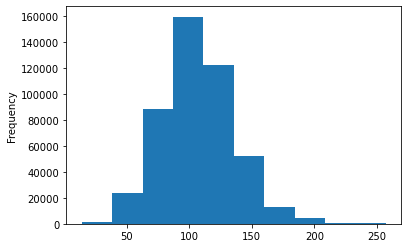

In [11]:
# Analysing the distribution of the numerical features
# 1. tract_to_msamd_income
data_2_numerical["tract_to_msamd_income"].plot(kind = 'hist')

<ipython-input-12-8afaf36e46f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_numerical["action_taken_name"] = data_2["action_taken_name"]


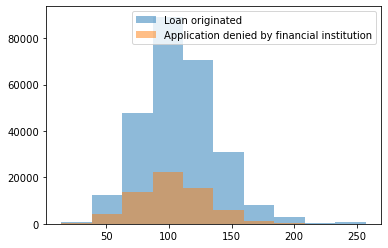

In [12]:
# analysing distribution of feature grouping by action taken
data_2_numerical["action_taken_name"] = data_2["action_taken_name"]
(n1, bins1, patches1) = plt.hist(data_2_numerical[data_2_numerical.action_taken_name == "Loan originated"]["tract_to_msamd_income"], alpha = 0.5, label = "Loan originated")
(n2, bins2, patches2) = plt.hist(data_2_numerical[data_2_numerical.action_taken_name == "Application denied by financial institution"]["tract_to_msamd_income"], alpha = 0.5, label = "Application denied by financial institution")
plt.legend(loc = "upper right")
plt.rcParams["figure.figsize"] = (7,7)
plt.show()

In [ ]:
# from the above diagram there is no visual difference between distribution of both the categories
# Now checking the numerical data of the same

In [13]:
print(n1)

[  791. 12412. 47934. 89230. 70765. 30967.  8043.  2746.   191.   571.]


In [14]:
print(bins1)

[ 14.05000019  38.35900163  62.66800307  86.97700451 111.28600595
 135.59500739 159.90400884 184.21301028 208.52201172 232.83101316
 257.1400146 ]


In [15]:
print(n2)

[  176.  4299. 13619. 22384. 15382.  6105.  1417.   491.    30.   103.]


In [16]:
print(bins2)

[ 14.05000019  38.35900163  62.66800307  86.97700451 111.28600595
 135.59500739 159.90400884 184.21301028 208.52201172 232.83101316
 257.1400146 ]


In [17]:
df_numerical_dist = pd.DataFrame({"tract_to_msamd_income bin lower end": bins1[:-1], "tract_to_msamd_income bin upper end": bins1[1:], "tract_to_msamd_income Loan originated Freq" : n1, "tract_to_msamd_income Application denied by financial institution Freq" : n2})
df_numerical_dist

,tract_to_msamd_income bin lower end,tract_to_msamd_income bin upper end,tract_to_msamd_income Loan originated Freq,tract_to_msamd_income Application denied by financial institution Freq
0,14.050000,38.359002,791.0,176.0
1,38.359002,62.668003,12412.0,4299.0
2,62.668003,86.977005,47934.0,13619.0
3,86.977005,111.286006,89230.0,22384.0
4,111.286006,135.595007,70765.0,15382.0
5,135.595007,159.904009,30967.0,6105.0
6,159.904009,184.213010,8043.0,1417.0
7,184.213010,208.522012,2746.0,491.0
8,208.522012,232.831013,191.0,30.0
9,232.831013,257.140015,571.0,103.0


In [18]:
df_numerical_dist["tract_to_msamd_income Loan originated % Freq"] = df_numerical_dist["tract_to_msamd_income Loan originated Freq"]*100/sum(df_numerical_dist["tract_to_msamd_income Loan originated Freq"])
df_numerical_dist["tract_to_msamd_income Application denied by financial institution % Freq"] = df_numerical_dist["tract_to_msamd_income Application denied by financial institution Freq"]*100/sum(df_numerical_dist["tract_to_msamd_income Application denied by financial institution Freq"])
df_numerical_dist

,tract_to_msamd_income bin lower end,tract_to_msamd_income bin upper end,tract_to_msamd_income Loan originated Freq,tract_to_msamd_income Application denied by financial institution Freq,tract_to_msamd_income Loan originated % Freq,tract_to_msamd_income Application denied by financial institution % Freq
0,14.050000,38.359002,791.0,176.0,0.300019,0.274974
1,38.359002,62.668003,12412.0,4299.0,4.707756,6.716558
2,62.668003,86.977005,47934.0,13619.0,18.180922,21.277693
3,86.977005,111.286006,89230.0,22384.0,33.844112,34.971721
4,111.286006,135.595007,70765.0,15382.0,26.840508,24.032122
5,135.595007,159.904009,30967.0,6105.0,11.745496,9.538168
6,159.904009,184.213010,8043.0,1417.0,3.050635,2.213855
7,184.213010,208.522012,2746.0,491.0,1.041532,0.767116
8,208.522012,232.831013,191.0,30.0,0.072445,0.046871
9,232.831013,257.140015,571.0,103.0,0.216575,0.160922


In [ ]:
# From this also we can say same as the graph that there is no change in distribution of feature for the two values of action taken


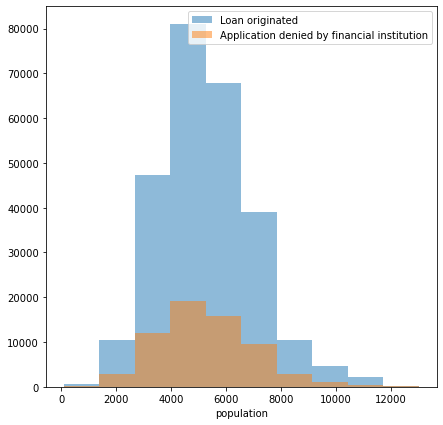

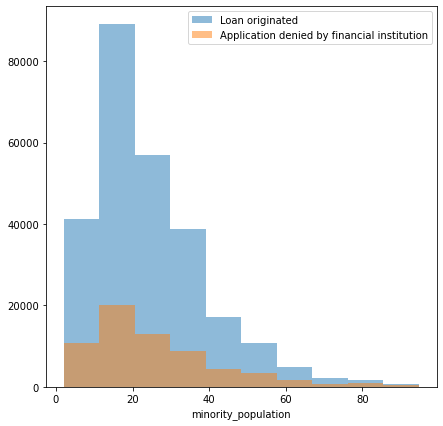

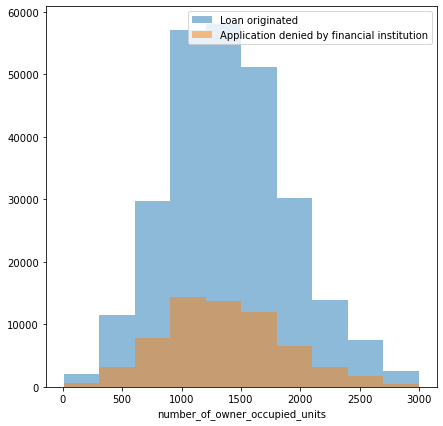

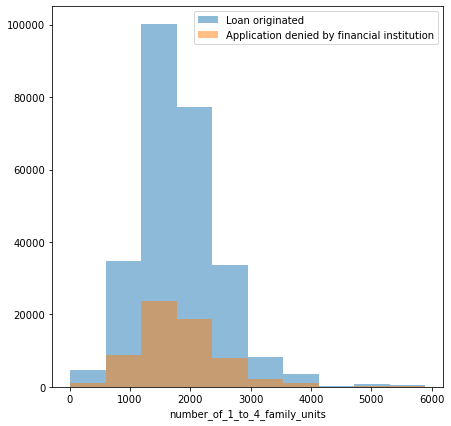

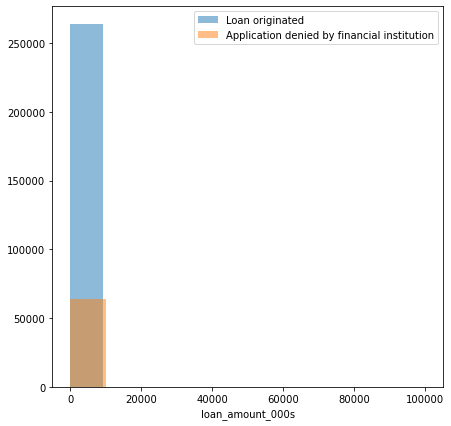

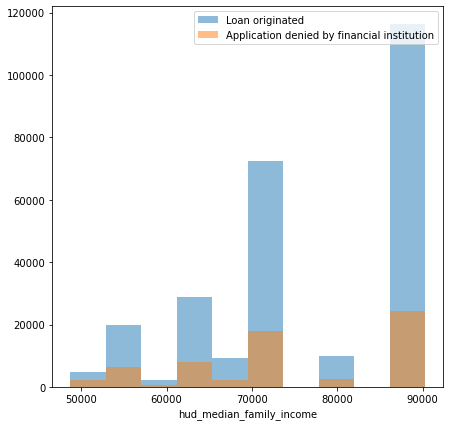

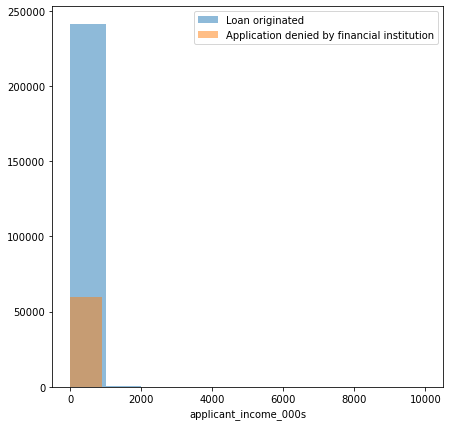

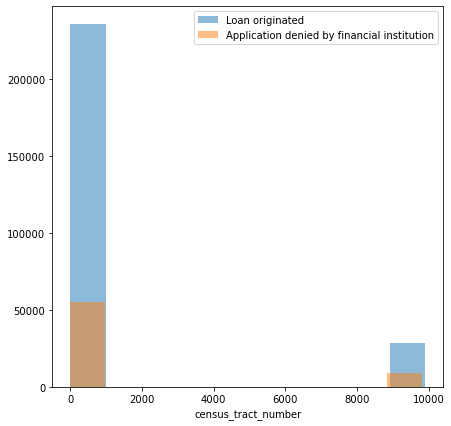

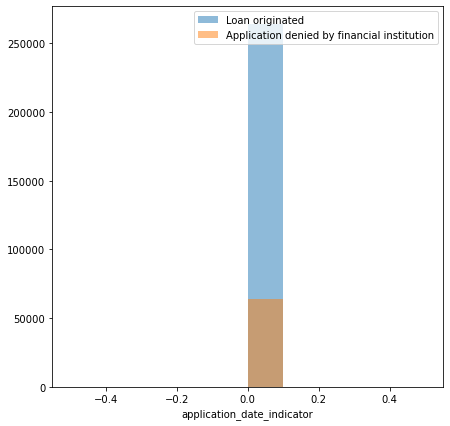

In [19]:
# performing the same analysis for other features
for feature in data_2_numerical.columns.tolist()[1:-1]:
    (n1, bins1, patches1) = plt.hist(data_2_numerical[data_2_numerical.action_taken_name == "Loan originated"][feature], alpha = 0.5, label = "Loan originated")
    (n2, bins2, patches2) = plt.hist(data_2_numerical[data_2_numerical.action_taken_name == "Application denied by financial institution"][feature], alpha = 0.5, label = "Application denied by financial institution")
    plt.legend(loc = "upper right")
    plt.xlabel(feature)
    plt.rcParams["figure.figsize"] = (7,7)
    plt.show()
    df_numerical_dist[feature + " bin lower end"] = bins1[:-1]
    df_numerical_dist[feature + " bin upper end"] = bins1[1:]
    df_numerical_dist[feature + " Loan originated Freq"] = n1
    df_numerical_dist[feature + " Application denied by financial institution Freq"] = n2
    df_numerical_dist[feature + " Loan originated % Freq"] = df_numerical_dist[feature + " Loan originated Freq"]*100/sum(df_numerical_dist[feature + " Loan originated Freq"])
    df_numerical_dist[feature + " Application denied by financial institution % Freq"] = df_numerical_dist[feature + " Application denied by financial institution Freq"]*100/sum(df_numerical_dist[feature + " Application denied by financial institution Freq"])
    

In [20]:
df_numerical_dist

,tract_to_msamd_income bin lower end,tract_to_msamd_income bin upper end,tract_to_msamd_income Loan originated Freq,tract_to_msamd_income Application denied by financial institution Freq,tract_to_msamd_income Loan originated % Freq,tract_to_msamd_income Application denied by financial institution % Freq,population bin lower end,population bin upper end,population Loan originated Freq,population Application denied by financial institution Freq,population Loan originated % Freq,population Application denied by financial institution % Freq,minority_population bin lower end,minority_population bin upper end,minority_population Loan originated Freq,minority_population Application denied by financial institution Freq,minority_population Loan originated % Freq,minority_population Application denied by financial institution % Freq,number_of_owner_occupied_units bin lower end,number_of_owner_occupied_units bin upper end,number_of_owner_occupied_units Loan originated Freq,number_of_owner_occupied_units Application denied by financial institution Freq,number_of_owner_occupied_units Loan originated % Freq,number_of_owner_occupied_units Application denied by financial institution % Freq,number_of_1_to_4_family_units bin lower end,number_of_1_to_4_family_units bin upper end,number_of_1_to_4_family_units Loan originated Freq,number_of_1_to_4_family_units Application denied by financial institution Freq,number_of_1_to_4_family_units Loan originated % Freq,number_of_1_to_4_family_units Application denied by financial institution % Freq,loan_amount_000s bin lower end,loan_amount_000s bin upper end,loan_amount_000s Loan originated Freq,loan_amount_000s Application denied by financial institution Freq,loan_amount_000s Loan originated % Freq,loan_amount_000s Application denied by financial institution % Freq,hud_median_family_income bin lower end,hud_median_family_income bin upper end,hud_median_family_income Loan originated Freq,hud_median_family_income Application denied by financial institution Freq,hud_median_family_income Loan originated % Freq,hud_median_family_income Application denied by financial institution % Freq,applicant_income_000s bin lower end,applicant_income_000s bin upper end,applicant_income_000s Loan originated Freq,applicant_income_000s Application denied by financial institution Freq,applicant_income_000s Loan originated % Freq,applicant_income_000s Application denied by financial institution % Freq,census_tract_number bin lower end,census_tract_number bin upper end,census_tract_number Loan originated Freq,census_tract_number Application denied by financial institution Freq,census_tract_number Loan originated % Freq,census_tract_number Application denied by financial institution % Freq,application_date_indicator bin lower end,application_date_indicator bin upper end,application_date_indicator Loan originated Freq,application_date_indicator Application denied by financial institution Freq,application_date_indicator Loan originated % Freq,application_date_indicator Application denied by financial institution % Freq
0,14.050000,38.359002,791.0,176.0,0.300019,0.274974,98.0,1390.7,519.0,157.0,0.196850,0.245286,2.040000,11.315000,41227.0,10754.0,15.636900,16.801287,10.0,308.7,2057.0,572.0,0.780201,0.893694,10.0,598.3,4631.0,1087.0,1.756489,1.698252,1.0,9284.2,263554.0,64164.0,99.940086,99.979744,48700.0,52860.0,4903.0,2194.0,1.859641,3.427697,1.0,1000.8,240819.0,59934.0,99.835003,99.616056,1.0,991.0,235340.0,55247.0,89.261264,86.312648,-0.5,-0.4,0.0,0.0,0.0,0.0
1,38.359002,62.668003,12412.0,4299.0,4.707756,6.716558,1390.7,2683.4,10410.0,2803.0,3.948387,4.379209,11.315000,20.590000,89012.0,20085.0,33.761170,31.379380,308.7,607.4,11540.0,3226.0,4.377015,5.040310,598.3,1186.6,34845.0,8710.0,13.216335,13.607887,9284.2,18567.4,84.0,7.0,0.031853,0.010907,52860.0,57020.0,19707.0,6345.0,7.474597,9.912823,1000.8,2000.6,300.0,179.0,0.124369,0.297515,991.0,1981.0,0.0,0.0,0.000000,0.000000,-0.4,-0.3,0.0,0.0,0.0,0.0
2,62.668003,86.977005,47934

In [ ]:
# From the graphs and the table, we can have the same conclusion for other numerical features as we had for tract_to_msamd_income
# There is no difference in distribution of numerical features when checking for "loan originated" vs "application denied by financial institution"

In [ ]:
# Now trying to look at this data in some other way, as we do not meaningful insights from histograms
# Sometime because of outliers, histograms are not the best way to visualise data
# We will create cross tables for each of them
# Before creating cross tables, we will have to bin them and before binning we will have to impute missing values

In [21]:
# Handling the null (missing) values in the numerical features
# First checking the % of null in 
percent_null = pd.DataFrame(100.00*data_2_numerical.isnull().sum()/len(data_2_numerical))
percent_null

,0
tract_to_msamd_income,0.131814
population,0.130742
minority_population,0.130742
number_of_owner_occupied_units,0.133314
number_of_1_to_4_family_units,0.130957
loan_amount_000s,0.000000
hud_median_family_income,0.129885
applicant_income_000s,13.295654
census_tract_number,0.129885
application_date_indicator,0.000000


In [22]:
# Handling the null (missing) values in the numerical features
def impute_missing_values(data, imputation_algo = 'constant', constant = -1, return_features_with_missing_values = 0):  
    '''
    ##########################################################################################################################################
    ## Use this to impute missing values of the features ###########
    ##########################################################################################################################################
    
    #Input:
        #data: The raw dataframe 
        #imputation_algo : The method with which you want to replace the missing values with. 4 choices: 'mean', 'median', 'mode', 'constant'
        #constant : If you chose 'constant' above, put the value of the constant you want. Default is set to -1
        #return_features_with_missing_values: When set to 1 the function also returns the list of features whose missing values were replaced
    #Output:
        #data_with_imputed_missing_values: A dataframe with imputed values as per your chosen imputation_algo
        #features_with_missing_values: A list of features which contains missing values. Works only when return_features_with_missing_values is not 0
      
    #Note that if the entire column is NULL, then missing value imputation using mean/median/mode won't work. 
    #It's a good idea to remove constant features first or use a constant to impute missing values
    ###########################################################################################################################################
    '''
    data_with_imputed_missing_values = pd.DataFrame.copy(data)
    percent_null = pd.DataFrame(100.00*data_with_imputed_missing_values.isnull().sum()/len(data_with_imputed_missing_values))
    features_with_missing_values = percent_null[percent_null[0] > 0].index.tolist()

    feature_list = list(data_with_imputed_missing_values.columns.values)
        
    for var in feature_list:
        str_filter = type(data_with_imputed_missing_values[var][0])
        
        if (str_filter != str):
            if (imputation_algo == 'mean'):
                data_with_imputed_missing_values[var] = data_with_imputed_missing_values[var].fillna(data_with_imputed_missing_values[var].mean())
            elif (imputation_algo == 'median'):
                data_with_imputed_missing_values[var] = data_with_imputed_missing_values[var].fillna(data_with_imputed_missing_values[var].median())
            elif (imputation_algo == 'mode'):
                data_with_imputed_missing_values[var] = data_with_imputed_missing_values[var].fillna(data_with_imputed_missing_values[var].mode().values[0])
            elif (imputation_algo == 'constant'):
                data_with_imputed_missing_values[var] = data_with_imputed_missing_values[var].fillna(constant) 
    
    if return_features_with_missing_values == 0:
        return data_with_imputed_missing_values
    else:
        return data_with_imputed_missing_values, features_with_missing_values

In [23]:
# Now if the feature has very less nulls (<5%) we will use median as our missing values imputation method
# Else we will use constant and impute it with -999
percent_null = pd.DataFrame(100.00*data_2_numerical.isnull().sum()/len(data_2_numerical))
cols_with_less_nulls = percent_null[percent_null[0] < 5].index.tolist()
cols_with_more_nulls = percent_null[percent_null[0] >= 5].index.tolist()
print("cols with less than 5% nulls: ", cols_with_less_nulls)
print("cols with more than 5% nulls: ", cols_with_more_nulls)

cols with less than 5% nulls:  ['tract_to_msamd_income', 'population', 'minority_population', 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units', 'loan_amount_000s', 'hud_median_family_income', 'census_tract_number', 'application_date_indicator', 'action_taken_name']
cols with more than 5% nulls:  ['applicant_income_000s']


In [24]:
data_2_numerical_less_nulls = data_2_numerical[cols_with_less_nulls]
data_2_numerical_more_nulls = data_2_numerical[cols_with_more_nulls]

In [25]:
data_2_numerical_less_nulls_imputed_median = impute_missing_values(data_2_numerical_less_nulls, imputation_algo = 'median')
data_2_numerical_more_nulls_imputed_constant = impute_missing_values(data_2_numerical_more_nulls, imputation_algo = 'constant', constant = -999)
data_2_numerical_nulls_imputed = pd.concat([data_2_numerical_less_nulls_imputed_median, data_2_numerical_more_nulls_imputed_constant], axis = 1)
data_2_numerical_nulls_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466566 entries, 0 to 466565
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tract_to_msamd_income           466566 non-null  float64
 1   population                      466566 non-null  float64
 2   minority_population             466566 non-null  float64
 3   number_of_owner_occupied_units  466566 non-null  float64
 4   number_of_1_to_4_family_units   466566 non-null  float64
 5   loan_amount_000s                466566 non-null  int64  
 6   hud_median_family_income        466566 non-null  float64
 7   census_tract_number             466566 non-null  float64
 8   application_date_indicator      466566 non-null  int64  
 9   action_taken_name               466566 non-null  object 
 10  applicant_income_000s           466566 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 39.2+ MB


In [26]:
data_2_numerical_nulls_imputed

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,census_tract_number,application_date_indicator,action_taken_name,applicant_income_000s
0,121.690002,8381.0,23.790001,2175.0,2660.0,227,73300.0,413.27,0,Loan originated,116.0
1,83.370003,4915.0,23.990000,1268.0,1777.0,240,57900.0,9208.01,0,Loan originated,42.0
2,91.129997,5075.0,11.820000,1136.0,1838.0,241,73300.0,414.00,0,Loan originated,117.0
3,146.169998,5032.0,8.590000,1525.0,1820.0,351,73300.0,405.10,0,Loan originated,315.0
4,162.470001,5183.0,10.500000,1705.0,2104.0,417,78100.0,907.00,0,Loan originated,114.0
...,...,...,...,...,...,...,...,...,...,...,...
466561,104.529999,5173.0,20.750000,1359.0,1734.0,178,73300.0,323.22,0,Preapproval request denied by financial instit...,97.0
466562,104.529999,5173.0,20.750000,1359.0,1734.0,110,73300.0,323.22,0,Preapproval request denied by financial instit...,30.0
466563,104.529999,5173.0,20.750000,1359.0,1734.0,420,73300.0,323.22,0,Preapproval request approved but not accepted,71.0
466564,88.690002,4725.0,45.880001,1188.0,1686.0,255,72300.0,714.11,0,Preapproval request approved but not accepted,77.0


In [27]:
data_2_numerical_nulls_imputed.max()

tract_to_msamd_income                                                    257.140015
population                                                                  13025.0
minority_population                                                       94.790001
number_of_owner_occupied_units                                               2997.0
number_of_1_to_4_family_units                                                5893.0
loan_amount_000s                                                              99999
hud_median_family_income                                                    90300.0
census_tract_number                                                          9901.0
application_date_indicator                                                        2
action_taken_name                 Preapproval request denied by financial instit...
applicant_income_000s                                                        9999.0
dtype: object

In [28]:
data_2_numerical_nulls_imputed.min()

tract_to_msamd_income                                             14.05
population                                                          5.0
minority_population                                                2.04
number_of_owner_occupied_units                                     10.0
number_of_1_to_4_family_units                                      10.0
loan_amount_000s                                                      1
hud_median_family_income                                        48700.0
census_tract_number                                                 1.0
application_date_indicator                                            0
action_taken_name                 Application approved but not accepted
applicant_income_000s                                            -999.0
dtype: object

In [29]:
# Now Binning the features using decision trees
def binning_features(df, min_value = -1, max_value = 100001, thresh_uniq = 7, null_replaced_by = -999, max_leaf_nodes = 7, max_depth = 3, min_samples_leaf = 2500, min_samples_split = 5500):

    '''
    
    This function is used to automatically bin features using Decision Tree Regressor.
    A Decision Tree is trained by giving the column values as input and output.
    By using the max_depth, min_samples_leaf and max_leaf_nodes one can get the optimal bins for each feature.
    
    The input paramters of the functions are explained as below:
        
        1. df: The input dataframe where NULL are replaced by some high negative values (The value used to impute the null should be at least 5 less than the least value of the dataframe).
        2. min_value: the minimum value amoung all the features and all the rows in the input dataframe after neglecting the high negative value of imputed null cells.
        3. max_value: the maximum value in the input dataframe
        4. thresh_uniq: The minimum number of unique values required in a column in order to qualify for binning (columns having less total unique values then the given threshold would be assumed as already binned)
        5. null_replaced_by: What is the number that is used to replace null in the given dataframe.
        6. max_leaf_nodes: the fixed value for max_leaf_nodes
        7. max_depth: the fixed value for max_depth
        8. min_samples_leaf: the fixed value for min_samples_leaf
        9 min_samples_split: the fixed value for min_samples_split
        
    The functions returns the following 2 dataframes:
        
        01. binned_df: The final binned dataframe
        02. thresholds_new_df: thresholds used for each column to bin the data
               
    '''
    
    def binning_data(x, max_leaf_nodes = 4, max_depth = 3, min_samples_leaf = 25, min_samples_split = 55):        
    
        X = np.swapaxes(np.array([x]),0,1)
        y = x
        
        max_depth = max_depth
        min_samples_leaf = min_samples_leaf  
        max_leaf_nodes = max_leaf_nodes
        
        clf_1 = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split, max_leaf_nodes= max_leaf_nodes, random_state = 100)
        clf_1.fit(X, y)
        
        thresholds = np.unique( clf_1.tree_.threshold[clf_1.tree_.feature > -2] )
        thresholds = np.sort(thresholds)
        
        return thresholds
   
    binned_df = pd.DataFrame()
    thresholds_new = []
    cols_binned = []

    for var in tqdm(df.columns.tolist()):
        
        if df[var].nunique() > thresh_uniq:
            cols_binned.append(var)
            col = pd.DataFrame(df[var])
            col_non_null = col[col[var] >= min_value]
            col_non_null_values = col_non_null[var].values
            thresholds = binning_data(col_non_null_values, max_leaf_nodes = max_leaf_nodes, max_depth = max_depth, min_samples_leaf = min_samples_leaf)
            thresholds = thresholds.tolist()
            thresholds.insert(0,min_value - 1)
            thresholds.insert(0,null_replaced_by - 1)
            thresholds.append(max_value + 1)
            thresholds_new.append(thresholds)
            var_col = col[var]
            binned_col = pd.cut(var_col,bins=thresholds)
            binned_df[var] = binned_col
        else:
            binned_df[var] = df[var]
    
    thresholds_new_df = pd.DataFrame(pd.DataFrame(thresholds_new).values.T.tolist(), columns = cols_binned)
    
    return binned_df, thresholds_new_df

In [30]:
data_2_numerical_nulls_imputed_binned, thresholds_new_df = binning_features(data_2_numerical_nulls_imputed.drop(["action_taken_name"], axis = 1), min_value = -1, max_value = 100001, thresh_uniq = 7, null_replaced_by = -999, max_leaf_nodes = 7, max_depth = 3, min_samples_leaf = 2500, min_samples_split = 5500)
thresholds_new_df

100%|██████████| 10/10 [00:01<00:00,  9.70it/s]


,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,census_tract_number,applicant_income_000s
0,-1000.000000,-1000.0,-1000.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.00000,-1000.0
1,-2.000000,-2.0,-2.000000,-2.0,-2.0,-2.0,-2.0,-2.00000,-2.0
2,81.989998,3049.0,17.835000,658.0,1323.5,197.5,58650.0,173.00000,86.5
3,95.985001,3989.5,24.285000,956.5,1644.0,351.5,64450.0,364.50000,155.5
4,109.980003,5502.5,30.990000,1202.5,1974.5,633.5,71100.0,611.50000,284.5
5,124.625000,6375.0,40.270000,1433.5,2402.0,1345.5,84200.0,5064.51001,576.5
6,142.019997,7338.5,51.415001,1959.5,2958.5,100002.0,100002.0,9304.50000,100002.0
7,170.680000,8893.0,69.645000,2338.5,4251.5,NaN,NaN,9564.00000,NaN
8,100002.000000,100002.0,100002.000000,100002.0,100002.0,NaN,NaN,100002.00000,NaN


In [151]:
thresholds_new_df.to_csv("thresholds_new_df.csv")

In [31]:
data_2_numerical_nulls_imputed_binned

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,census_tract_number,application_date_indicator,applicant_income_000s
0,"(109.98, 124.625]","(7338.5, 8893.0]","(17.835, 24.285]","(1959.5, 2338.5]","(2402.0, 2958.5]","(197.5, 351.5]","(71100.0, 84200.0]","(364.5, 611.5]",0,"(86.5, 155.5]"
1,"(81.99, 95.985]","(3989.5, 5502.5]","(17.835, 24.285]","(1202.5, 1433.5]","(1644.0, 1974.5]","(197.5, 351.5]","(-2.0, 58650.0]","(5064.51, 9304.5]",0,"(-2.0, 86.5]"
2,"(81.99, 95.985]","(3989.5, 5502.5]","(-2.0, 17.835]","(956.5, 1202.5]","(1644.0, 1974.5]","(197.5, 351.5]","(71100.0, 84200.0]","(364.5, 611.5]",0,"(86.5, 155.5]"
3,"(142.02, 170.68]","(3989.5, 5502.5]","(-2.0, 17.835]","(1433.5, 1959.5]","(1644.0, 1974.5]","(197.5, 351.5]","(71100.0, 84200.0]","(364.5, 611.5]",0,"(284.5, 576.5]"
4,"(142.02, 170.68]","(3989.5, 5502.5]","(-2.0, 17.835]","(1433.5, 1959.5]","(1974.5, 2402.0]","(351.5, 633.5]","(71100.0, 84200.0]","(611.5, 5064.51]",0,"(86.5, 155.5]"
...,...,...,...,...,...,...,...,...,...,...
466561,"(95.985, 109.98]","(3989.5, 5502.5]","(17.835, 24.285]","(1202.5, 1433.5]","(1644.0, 1974.5]","(-2.0, 197.5]","(71100.0, 84200.0]","(173.0, 364.5]",0,"(86.5, 155.5]"
466562,"(95.985, 109.98]","(3989.5, 5502.5]","(17.835, 24.285]","(1202.5, 1433.5]","(1644.0, 1974.5]","(-2.0, 197.5]","(71100.0, 84200.0]","(173.0, 364.5]",0,"(-2.0, 86.5]"
466563,"(95.985, 109.98]","(3989.5, 5502.5]","(17.835, 24.285]","(1202.5, 1433.5]","(1644.0, 1974.5]","(351.5, 633.5]","(71100.0, 84200.0]","(173.0, 364.5]",0,"(-2.0, 86.5]"
466564,"(81.99, 95.985]","(3989.5, 5502.5]","(40.27, 51.415]","(956.5, 1202.5]","(1644.0, 1974.5]","(197.5, 351.5]","(71100.0, 84200.0]","(611.5, 5064.51]",0,"(-2.0, 86.5]"


In [32]:
data_2_numerical_nulls_imputed_binned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466566 entries, 0 to 466565
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   tract_to_msamd_income           466566 non-null  category
 1   population                      466566 non-null  category
 2   minority_population             466566 non-null  category
 3   number_of_owner_occupied_units  466566 non-null  category
 4   number_of_1_to_4_family_units   466566 non-null  category
 5   loan_amount_000s                466566 non-null  category
 6   hud_median_family_income        466566 non-null  category
 7   census_tract_number             466566 non-null  category
 8   application_date_indicator      466566 non-null  int64   
 9   applicant_income_000s           466566 non-null  category
dtypes: category(9), int64(1)
memory usage: 7.6 MB


In [33]:
data_2_numerical_nulls_imputed_binned["action_taken_name"] = data_2_numerical_nulls_imputed["action_taken_name"]

In [34]:
# Checking which features are rank ordering
dfs = []
for i in tqdm(data_2_numerical_nulls_imputed_binned.columns.tolist()):
    x = pd.crosstab(data_2_numerical_nulls_imputed_binned[(data_2_numerical_nulls_imputed_binned.action_taken_name == "Loan originated") | (data_2_numerical_nulls_imputed_binned.action_taken_name == "Application denied by financial institution")][i], data_2_numerical_nulls_imputed_binned[(data_2_numerical_nulls_imputed_binned.action_taken_name == "Loan originated") | (data_2_numerical_nulls_imputed_binned.action_taken_name == "Application denied by financial institution")]["action_taken_name"])
    x["% Loan originated"] = x["Loan originated"]/( x["Application denied by financial institution"] + x["Loan originated"] )
    dfs.append(x)

100%|██████████| 11/11 [00:01<00:00,  6.17it/s]


In [35]:
# Here we see that as the tract_to_msamd_income increases, % of Loan originated also increases
dfs[0]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
tract_to_msamd_income,,,
"(-2.0, 81.99]",14058,46114,0.766370
"(81.99, 95.985]",12375,47626,0.793753
"(95.985, 109.98]",12977,51371,0.798331
"(109.98, 124.625]",11209,50927,0.819605
"(124.625, 142.02]",7503,35673,0.826223
"(142.02, 170.68]",4825,24774,0.836988
"(170.68, 100002.0]",1230,7227,0.854558


In [36]:
# Here we see that population has no effect on % on Loan originated
dfs[1]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
population,,,
"(-2.0, 3049.0]",5325,19735,0.787510
"(3049.0, 3989.5]",9844,38918,0.798121
"(3989.5, 5502.5]",22219,93706,0.808333
"(5502.5, 6375.0]",10868,47023,0.812268
"(6375.0, 7338.5]",8591,35524,0.805259
"(7338.5, 8893.0]",5542,21168,0.792512
"(8893.0, 100002.0]",1788,7638,0.810312


In [37]:
# Here we see that as the minority_population increases, % of Loan originated decreases
dfs[2]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
minority_population,,,
"(-2.0, 17.835]",25861,107108,0.805511
"(17.835, 24.285]",11878,53602,0.818601
"(24.285, 30.99]",7264,31754,0.813830
"(30.99, 40.27]",8424,37028,0.814662
"(40.27, 51.415]",4984,18319,0.786122
"(51.415, 69.645]",3932,12276,0.757404
"(69.645, 100002.0]",1834,3625,0.664041


In [38]:
# Here we see that number_of_owner_occupied_units has no effect on % of Loan originated
dfs[3]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
number_of_owner_occupied_units,,,
"(-2.0, 658.0]",4718,16888,0.781635
"(658.0, 956.5]",8911,34180,0.793205
"(956.5, 1202.5]",12301,48656,0.798202
"(1202.5, 1433.5]",10927,45202,0.805323
"(1433.5, 1959.5]",19083,82109,0.811418
"(1959.5, 2338.5]",5450,24634,0.818841
"(2338.5, 100002.0]",2787,12043,0.812070


In [39]:
# Here we see that number_of_1_to_4_family_units has no effect on % of Loan originated
dfs[4]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
number_of_1_to_4_family_units,,,
"(-2.0, 1323.5]",13516,55185,0.803263
"(1323.5, 1644.0]",14410,60145,0.806720
"(1644.0, 1974.5]",12916,53490,0.805500
"(1974.5, 2402.0]",12982,53476,0.804659
"(2402.0, 2958.5]",6639,28049,0.808608
"(2958.5, 4251.5]",3265,11823,0.783603
"(4251.5, 100002.0]",449,1544,0.774711


In [40]:
# Here we see that as the loan_amount_000s increase, % of Loan originated increases
dfs[5]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
loan_amount_000s,,,
"(-2.0, 197.5]",28471,79313,0.735851
"(197.5, 351.5]",24239,114315,0.825057
"(351.5, 633.5]",9288,58847,0.863682
"(633.5, 1345.5]",1879,9511,0.835031
"(1345.5, 100002.0]",300,1726,0.851925


In [41]:
# Here we see that as the hud_median_family_income increase, % of Loan originated increases
dfs[6]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
hud_median_family_income,,,
"(-2.0, 58650.0]",8979,26269,0.745262
"(58650.0, 64450.0]",8129,29367,0.783204
"(64450.0, 71100.0]",4058,16742,0.804904
"(71100.0, 84200.0]",18739,75154,0.800422
"(84200.0, 100002.0]",24272,116180,0.827187


In [42]:
# Here we see that census_tract_number has no effects on % of Loan originated
dfs[7]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
census_tract_number,,,
"(-2.0, 173.0]",19236,80432,0.806999
"(173.0, 364.5]",13419,58661,0.813832
"(364.5, 611.5]",12671,58376,0.821653
"(611.5, 5064.51]",10090,37930,0.789879
"(5064.51, 9304.5]",418,1590,0.791833
"(9304.5, 9564.0]",3965,12490,0.759040
"(9564.0, 100002.0]",4378,14233,0.764763


In [43]:
# Here we see that application_date_indicator has no effects on % of Loan originated
dfs[8]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
application_date_indicator,,,
0,64177,263712,0.804272


In [44]:
# Here we see that more applicant income relates to more % of loan originated, but we will have to make lesser bins for the feature
dfs[9]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
applicant_income_000s,,,
"(-1000.0, -2.0]",4012,22495,0.848644
"(-2.0, 86.5]",36874,108296,0.745994
"(86.5, 155.5]",15943,87758,0.846260
"(155.5, 284.5]",5559,35848,0.865747
"(284.5, 576.5]",1301,7799,0.857033
"(576.5, 100002.0]",488,1516,0.756487


In [45]:
# Rebinning the features manually by merging the bins that are not rank ordering well 
# (only for features that are rank ordering overall)
thresholds_new_df_manual = thresholds_new_df.copy()
data_2_numerical_nulls_imputed_binned_manual = data_2_numerical_nulls_imputed_binned.copy()

In [ ]:
# 1. tract_to_msamd_income
# Not required (as all bins are rank ordering well)

In [46]:
# 2. minority_population
# merging the bins: (-2.0, 17.835], (17.835, 24.285], (24.285, 30.99], (30.99, 40.27]
thresholds_new_df_manual["minority_population"] = [-1000, -2, 40.270000, 51.415001, 69.645000, 100002.000000, None, None, None]
data_2_numerical_nulls_imputed_binned_manual["minority_population"] = pd.cut(data_2_numerical_nulls_imputed["minority_population"], bins = thresholds_new_df_manual["minority_population"][:-3])

In [47]:
# calculating the new cross table with merged bins for minority_population
# rank ordering well
x = pd.crosstab(data_2_numerical_nulls_imputed_binned_manual[(data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Loan originated") | (data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Application denied by financial institution")]["minority_population"], data_2_numerical_nulls_imputed_binned_manual[(data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Loan originated") | (data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Application denied by financial institution")]["action_taken_name"])
x["% Loan originated"] = x["Loan originated"]/( x["Application denied by financial institution"] + x["Loan originated"] )
x

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
minority_population,,,
"(-2.0, 40.27]",53427,229492,0.811158
"(40.27, 51.415]",4984,18319,0.786122
"(51.415, 69.645]",3932,12276,0.757404
"(69.645, 100002.0]",1834,3625,0.664041


In [48]:
# 3. loan_amount_000s
# merging the bins: (351.5, 633.5], (633.5, 1345.5], (1345.5, 100002.0] 
thresholds_new_df_manual["loan_amount_000s"] = [-1000, -2, 197.5, 351.5, 100002, None, None, None, None]
data_2_numerical_nulls_imputed_binned_manual["loan_amount_000s"] = pd.cut(data_2_numerical_nulls_imputed["loan_amount_000s"], bins = thresholds_new_df_manual["loan_amount_000s"][:-4])


In [49]:
# calculating the new cross table with merged bins for loan_amount_000s
# rank ordering well
x = pd.crosstab(data_2_numerical_nulls_imputed_binned_manual[(data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Loan originated") | (data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Application denied by financial institution")]["loan_amount_000s"], data_2_numerical_nulls_imputed_binned_manual[(data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Loan originated") | (data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Application denied by financial institution")]["action_taken_name"])
x["% Loan originated"] = x["Loan originated"]/( x["Application denied by financial institution"] + x["Loan originated"] )
x

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
loan_amount_000s,,,
"(-2.0, 197.5]",28471,79313,0.735851
"(197.5, 351.5]",24239,114315,0.825057
"(351.5, 100002.0]",11467,70084,0.859389


In [50]:
# 4. hud_median_family_income
# merging the bins: (64450.0, 71100.0], (71100.0, 84200.0]
thresholds_new_df_manual["hud_median_family_income"] = [-1000, -2, 58650.0, 64450.0, 84200.0, 100002.0, None, None, None]
data_2_numerical_nulls_imputed_binned_manual["hud_median_family_income"] = pd.cut(data_2_numerical_nulls_imputed["hud_median_family_income"], bins = thresholds_new_df_manual["hud_median_family_income"][:-3])


In [51]:
# calculating the new cross table with merged bins for hud_median_family_income
# rank ordering well
x = pd.crosstab(data_2_numerical_nulls_imputed_binned_manual[(data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Loan originated") | (data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Application denied by financial institution")]["hud_median_family_income"], data_2_numerical_nulls_imputed_binned_manual[(data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Loan originated") | (data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Application denied by financial institution")]["action_taken_name"])
x["% Loan originated"] = x["Loan originated"]/( x["Application denied by financial institution"] + x["Loan originated"] )
x

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
hud_median_family_income,,,
"(-2.0, 58650.0]",8979,26269,0.745262
"(58650.0, 64450.0]",8129,29367,0.783204
"(64450.0, 84200.0]",22797,91896,0.801235
"(84200.0, 100002.0]",24272,116180,0.827187


In [52]:
# 5. applicant_income_000s
# (155.5, 284.5], (284.5, 576.5], (576.5, 100002.0]
thresholds_new_df_manual["applicant_income_000s"] = [-1000, -2, 86.500, 155.50, 100002.0, None, None, None, None]
data_2_numerical_nulls_imputed_binned_manual["applicant_income_000s"] = pd.cut(data_2_numerical_nulls_imputed["applicant_income_000s"], bins = thresholds_new_df_manual["applicant_income_000s"][:-4])


In [53]:
# calculating the new cross table with merged bins for applicant_income_000s
# rank ordering well
x = pd.crosstab(data_2_numerical_nulls_imputed_binned_manual[(data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Loan originated") | (data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Application denied by financial institution")]["applicant_income_000s"], data_2_numerical_nulls_imputed_binned_manual[(data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Loan originated") | (data_2_numerical_nulls_imputed_binned_manual.action_taken_name == "Application denied by financial institution")]["action_taken_name"])
x["% Loan originated"] = x["Loan originated"]/( x["Application denied by financial institution"] + x["Loan originated"] )
x

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
applicant_income_000s,,,
"(-1000.0, -2.0]",4012,22495,0.848644
"(-2.0, 86.5]",36874,108296,0.745994
"(86.5, 155.5]",15943,87758,0.846260
"(155.5, 100002.0]",7348,45163,0.860067


In [54]:
# Taking the 5 required columns with manual bins from the numerical features group
data_2_numerical_nulls_imputed_binned_manual_req = data_2_numerical_nulls_imputed_binned_manual[["tract_to_msamd_income","minority_population", "loan_amount_000s", "hud_median_family_income", "applicant_income_000s", "action_taken_name"]]
data_2_numerical_nulls_imputed_binned_manual_req                                                                                       

,tract_to_msamd_income,minority_population,loan_amount_000s,hud_median_family_income,applicant_income_000s,action_taken_name
0,"(109.98, 124.625]","(-2.0, 40.27]","(197.5, 351.5]","(64450.0, 84200.0]","(86.5, 155.5]",Loan originated
1,"(81.99, 95.985]","(-2.0, 40.27]","(197.5, 351.5]","(-2.0, 58650.0]","(-2.0, 86.5]",Loan originated
2,"(81.99, 95.985]","(-2.0, 40.27]","(197.5, 351.5]","(64450.0, 84200.0]","(86.5, 155.5]",Loan originated
3,"(142.02, 170.68]","(-2.0, 40.27]","(197.5, 351.5]","(64450.0, 84200.0]","(155.5, 100002.0]",Loan originated
4,"(142.02, 170.68]","(-2.0, 40.27]","(351.5, 100002.0]","(64450.0, 84200.0]","(86.5, 155.5]",Loan originated
...,...,...,...,...,...,...
466561,"(95.985, 109.98]","(-2.0, 40.27]","(-2.0, 197.5]","(64450.0, 84200.0]","(86.5, 155.5]",Preapproval request denied by financial instit...
466562,"(95.985, 109.98]","(-2.0, 40.27]","(-2.0, 197.5]","(64450.0, 84200.0]","(-2.0, 86.5]",Preapproval request denied by financial instit...
466563,"(95.985, 109.98]","(-2.0, 40.27]","(351.5, 100002.0]","(64450.0, 84200.0]","(-2.0, 86.5]",Preapproval request approved but not accepted
466564,"(81.99, 95.985]","(40.27, 51.415]","(197.5, 351.5]","(64450.0, 84200.0]","(-2.0, 86.5]",Preapproval request approved but not accepted


purchaser_type_name

Loan was not originated or was not sold in calendar year covered by register    220297
Fannie Mae (FNMA)                                                                75990
Ginnie Mae (GNMA)                                                                60831
Freddie Mac (FHLMC)                                                              51808
Life insurance company, credit union, mortgage bank, or finance company          21510
Commercial bank, savings bank or savings association                             18283
Other type of purchaser                                                          11921
Affiliate institution                                                             3994
Private securitization                                                            1914
Farmer Mac (FAMC)                                                                   18
Name: purchaser_type_name, dtype: int64



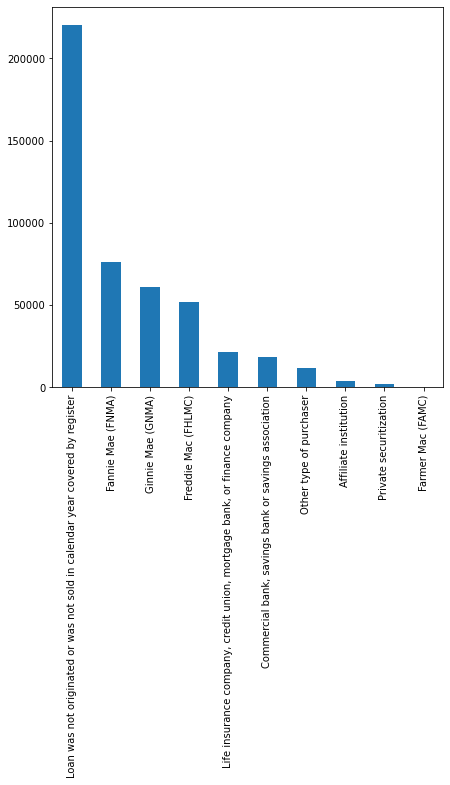


property_type_name

One-to-four family dwelling (other than manufactured housing)    450406
Manufactured housing                                              14504
Multifamily dwelling                                               1656
Name: property_type_name, dtype: int64



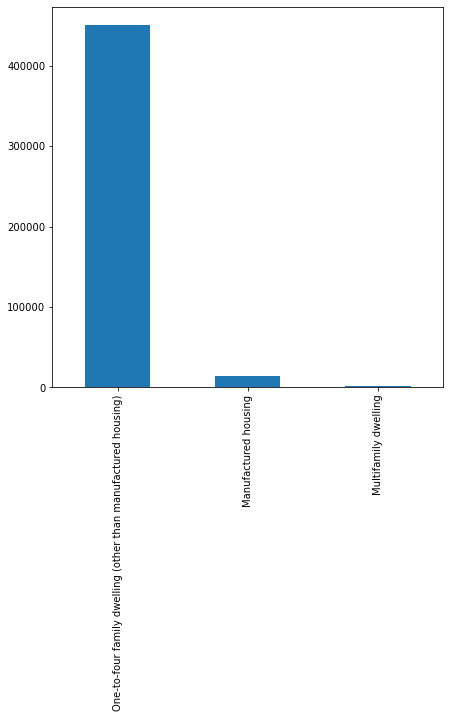


preapproval_name

Not applicable                   397521
Preapproval was not requested     57700
Preapproval was requested         11345
Name: preapproval_name, dtype: int64



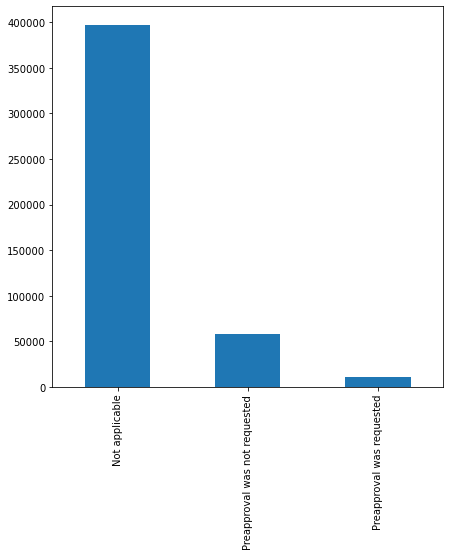


owner_occupancy_name

Owner-occupied as a principal dwelling        425048
Not owner-occupied as a principal dwelling     39719
Not applicable                                  1799
Name: owner_occupancy_name, dtype: int64



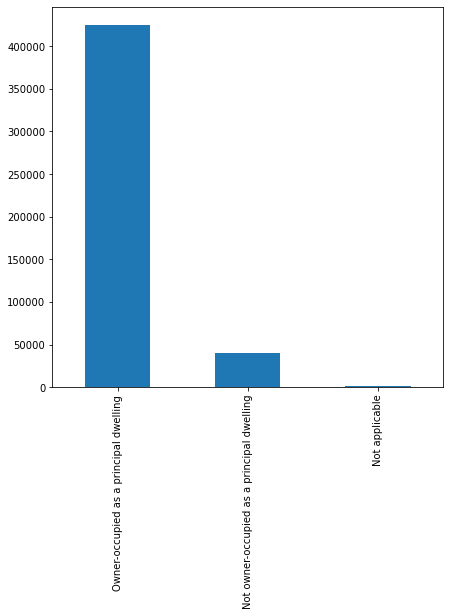


msamd_name

Seattle, Bellevue, Everett - WA            196473
Tacoma, Lakewood - WA                       61552
Portland, Vancouver, Hillsboro - OR, WA     38729
Spokane, Spokane Valley - WA                32050
Bremerton, Silverdale - WA                  18146
Olympia, Tumwater - WA                      17739
Kennewick, Richland - WA                    15949
Bellingham - WA                             12629
Yakima - WA                                  9731
Mount Vernon, Anacortes - WA                 7930
Longview - WA                                6940
Wenatchee - WA                               6242
Walla Walla - WA                             3099
Lewiston - ID, WA                            1083
Name: msamd_name, dtype: int64



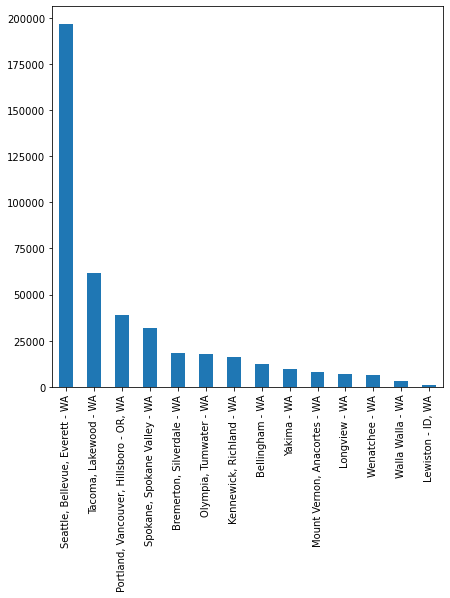


loan_type_name

Conventional          332433
FHA-insured            66754
VA-guaranteed          62915
FSA/RHS-guaranteed      4464
Name: loan_type_name, dtype: int64



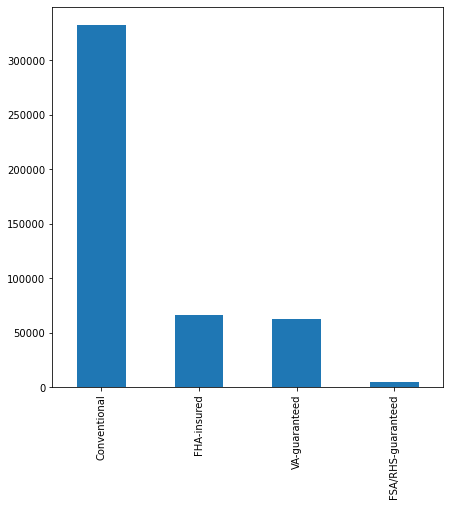


loan_purpose_name

Refinancing         250046
Home purchase       192684
Home improvement     23836
Name: loan_purpose_name, dtype: int64



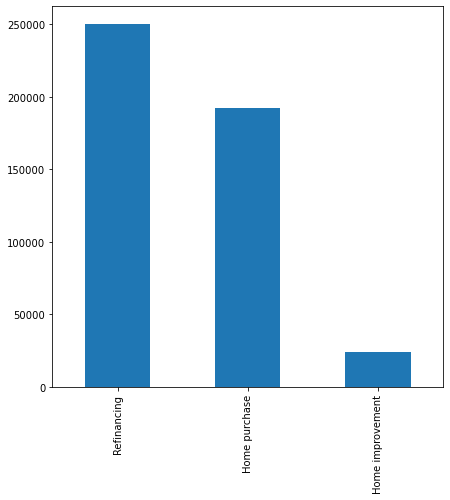


lien_status_name

Secured by a first lien          403525
Not applicable                    48356
Secured by a subordinate lien      9298
Not secured by a lien              5387
Name: lien_status_name, dtype: int64



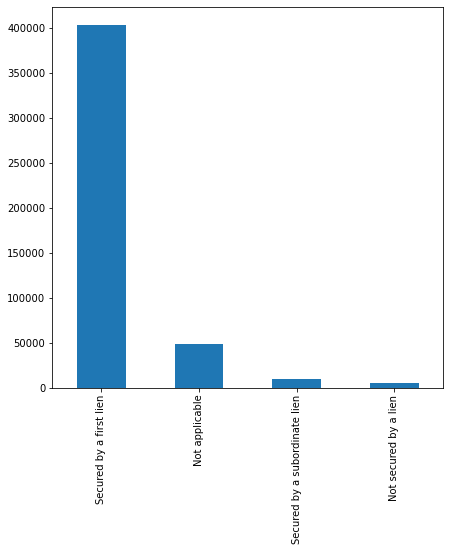


hoepa_status_name

Not a HOEPA loan    466553
HOEPA loan              13
Name: hoepa_status_name, dtype: int64



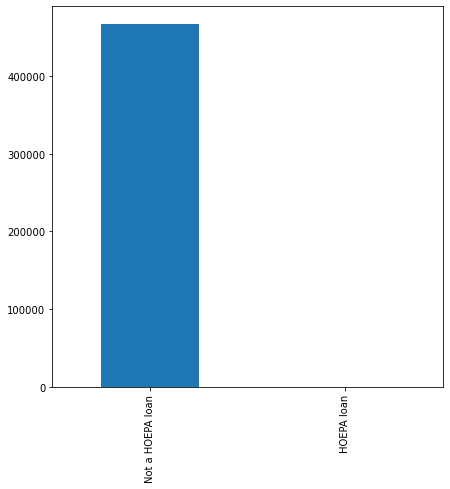


edit_status_name

Quality edit failure only    74505
Name: edit_status_name, dtype: int64



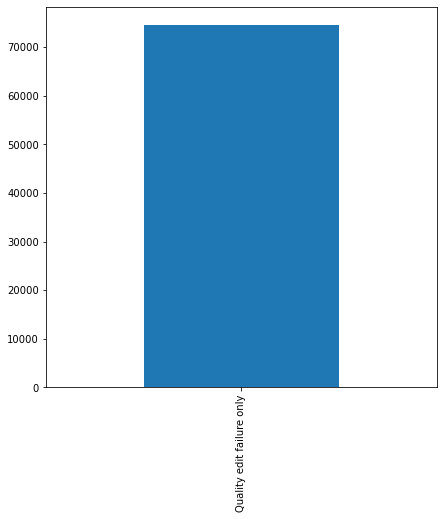


denial_reason_name_1

Debt-to-income ratio                              8648
Credit history                                    7671
Collateral                                        5748
Credit application incomplete                     5433
Other                                             4058
Unverifiable information                          1353
Insufficient cash (downpayment, closing costs)    1036
Employment history                                 535
Mortgage insurance denied                           17
Name: denial_reason_name_1, dtype: int64



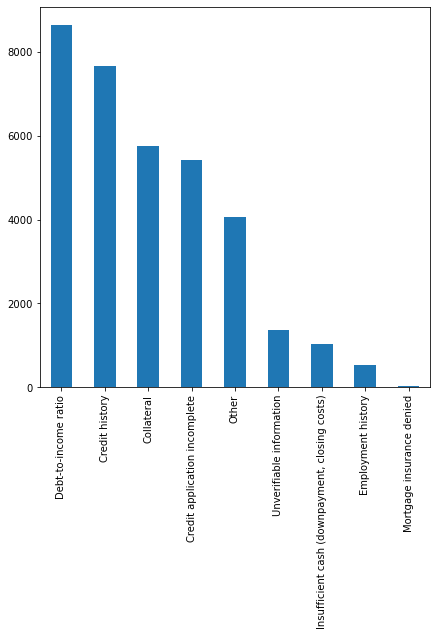


county_name

King County            137691
Pierce County           61562
Snohomish County        58831
Clark County            38024
Spokane County          29151
Kitsap County           18151
Thurston County         17742
Whatcom County          12649
Benton County           11459
Yakima County            9750
Skagit County            7958
Cowlitz County           6940
Island County            6905
Franklin County          4496
Chelan County            4187
Lewis County             3954
Mason County             3878
Clallam County           3633
Grant County             3549
Grays Harbor County      3454
Walla Walla County       2964
Kittitas County          2796
Stevens County           2138
Douglas County           2055
Jefferson County         1831
Whitman County           1444
Okanogan County          1362
Pacific County           1217
Asotin County            1083
San Juan County           982
Klickitat County          959
Pend Oreille County       792
Skamania County           

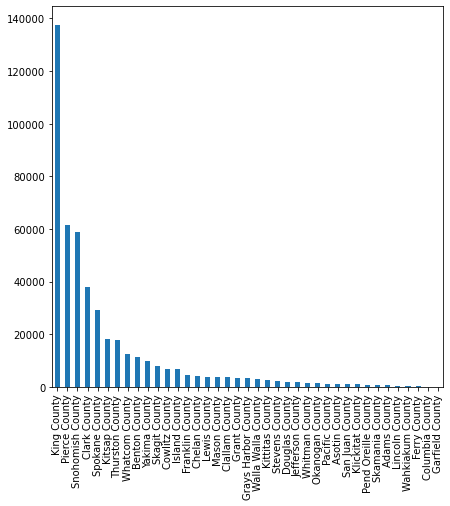


co_applicant_sex_name

No co-applicant                                                                      211725
Female                                                                               163306
Male                                                                                  39908
Not applicable                                                                        28554
Information not provided by applicant in mail, Internet, or telephone application     23073
Name: co_applicant_sex_name, dtype: int64



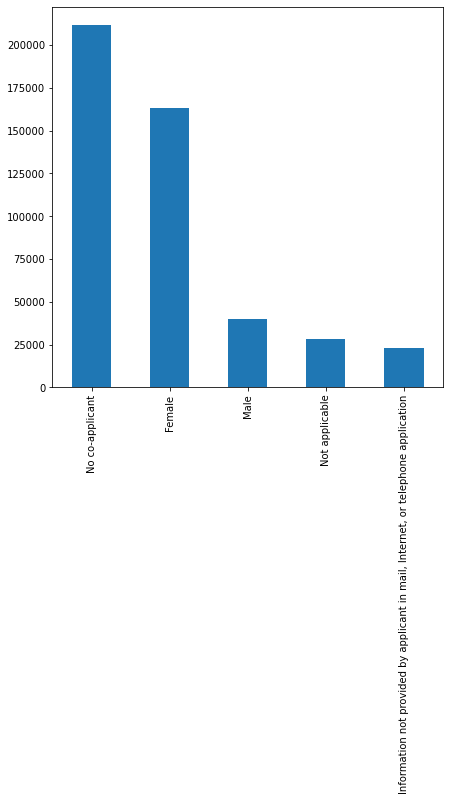


co_applicant_race_name_1

No co-applicant                                                                      211725
White                                                                                164296
Information not provided by applicant in mail, Internet, or telephone application     36025
Not applicable                                                                        28534
Asian                                                                                 18365
Black or African American                                                              3600
Native Hawaiian or Other Pacific Islander                                              2198
American Indian or Alaska Native                                                       1823
Name: co_applicant_race_name_1, dtype: int64



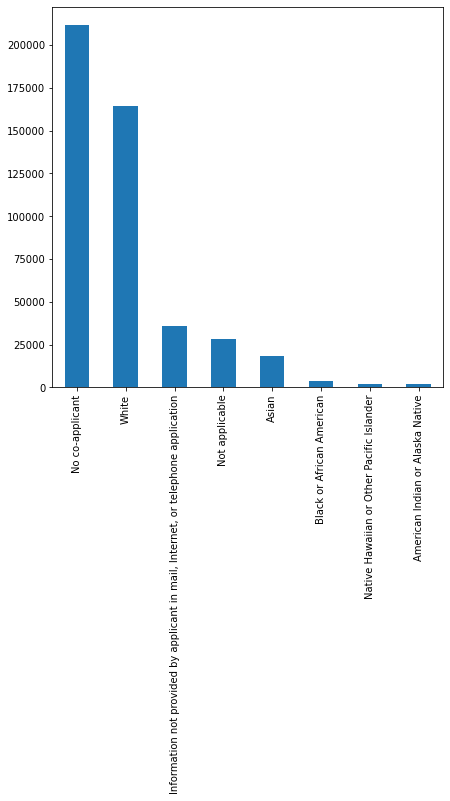


co_applicant_ethnicity_name

No co-applicant                                                                      211725
Not Hispanic or Latino                                                               179775
Information not provided by applicant in mail, Internet, or telephone application     35450
Not applicable                                                                        28593
Hispanic or Latino                                                                    11023
Name: co_applicant_ethnicity_name, dtype: int64



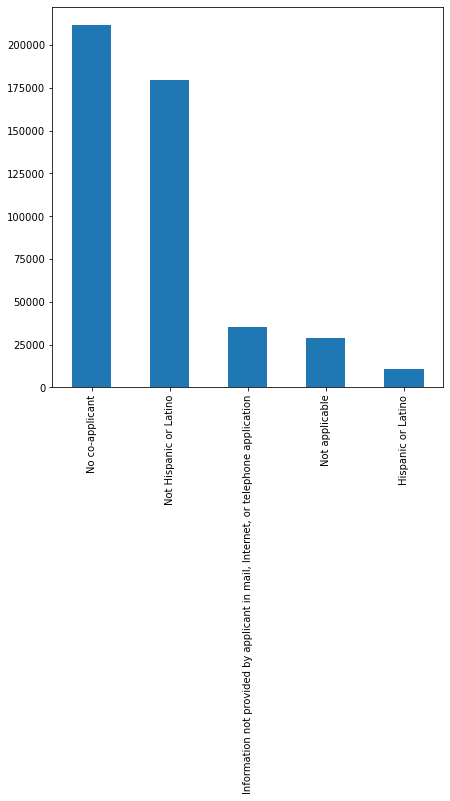


applicant_sex_name

Male                                                                                 283475
Female                                                                               110170
Information not provided by applicant in mail, Internet, or telephone application     39340
Not applicable                                                                        33581
Name: applicant_sex_name, dtype: int64



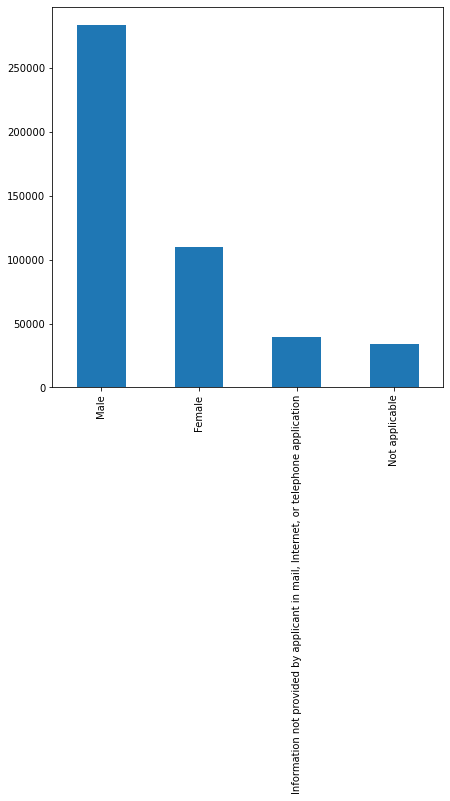


applicant_race_name_1

White                                                                                314812
Information not provided by applicant in mail, Internet, or telephone application     62330
Asian                                                                                 36816
Not applicable                                                                        33541
Black or African American                                                             10867
American Indian or Alaska Native                                                       4492
Native Hawaiian or Other Pacific Islander                                              3708
Name: applicant_race_name_1, dtype: int64



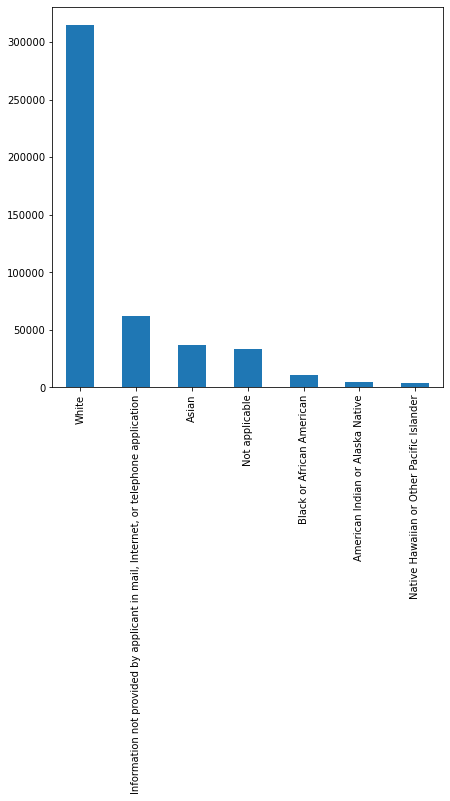


applicant_ethnicity_name

Not Hispanic or Latino                                                               350149
Information not provided by applicant in mail, Internet, or telephone application     60188
Not applicable                                                                        33650
Hispanic or Latino                                                                    22579
Name: applicant_ethnicity_name, dtype: int64



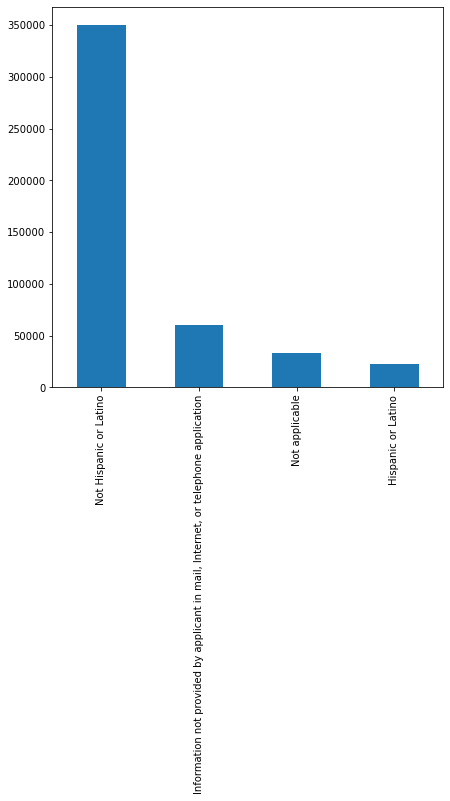


agency_name

Department of Housing and Urban Development    238716
Consumer Financial Protection Bureau           142502
Federal Deposit Insurance Corporation           45985
National Credit Union Administration            30538
Office of the Comptroller of the Currency        5581
Federal Reserve System                           3244
Name: agency_name, dtype: int64



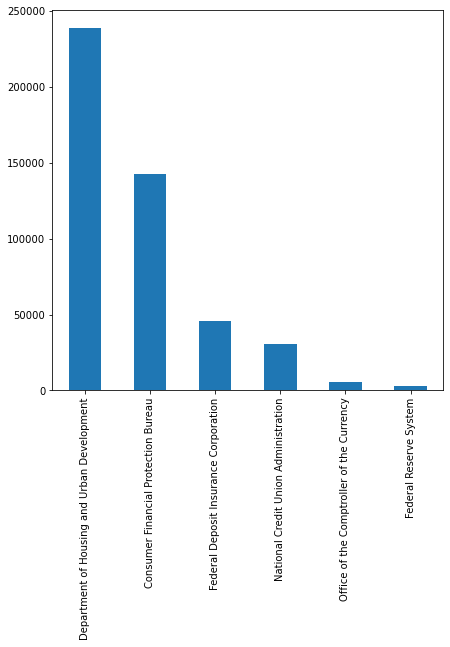


agency_abbr

HUD     238716
CFPB    142502
FDIC     45985
NCUA     30538
OCC       5581
FRS       3244
Name: agency_abbr, dtype: int64



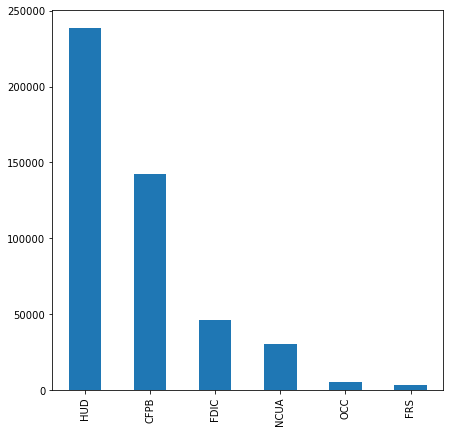


action_taken_name

Loan originated                                        263712
Application denied by financial institution             64177
Application withdrawn by applicant                      60358
Loan purchased by the institution                       48356
File closed for incompleteness                          18176
Application approved but not accepted                   11735
Preapproval request denied by financial institution        35
Preapproval request approved but not accepted              17
Name: action_taken_name, dtype: int64



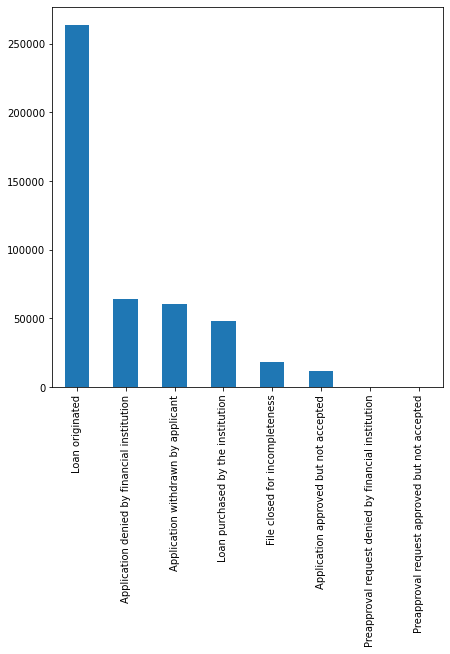

In [55]:
# Now moving forward to categorical columns:
# Seeing the distribution of values in each features
for i in data_2_categorical.columns.tolist():
    print(i)
    print("")
    print(data_2_categorical[i].value_counts())
    print("")
    data_2_categorical[i].value_counts().plot(kind = 'bar')
    plt.show()
    print("")

In [ ]:
# Observations from above graphs and tables:

# 1. purchaser_type_name
# Fannie Mae (FNMA) is the largest purchaser with almost 76K purchases and then the number decreases down to 18 with Farmer Mac (FAMC) as the smallest purchaser

# 2. property_type_name
# One-to-four family dwelling is the most common property name (more then 95% of rows having this value in the feature)

# 3. preapproval_name
# In the cases where this feature is applicable: compared to when pre approval was requested, in about 5 times that number, pre approval was not requested

# 4. owner_occupancy_name
# Out of total applicable cases, in only about 8-9 percent cases owner was not the principal dweller

# 5. msamd_name
# There are 14 different msamd but the rows are not uniformly distributed as the most common one (Seattle, Bellevue, Everett - WA) is present in about 40% of the cases

# 6. loan_type_name
# Most of them are conventional loans with some of them being FHA-insured, VA-guaranteed, FSA/RHS-guaranteed

# 7. loan_purpose_name
# Here we can see that both Refinancing and Home purchase combined account for almost all the cases in out dataset with Refinancing being the most common

# 8. lien_status_name
# 90% of the entities are secured by a first lein

# 9. hoepa_status_name
# All loans are "not a HOEPA loan" with only 13 odd cases (insignificant) being HOEPA loans

# 10. edit_status_name
# Only 1 unique value

# 11. denial_reason_name_1
# This tables describes the distribution of reasons why the loan was denied
# There are many reasons with "Debt-to-income ratio" and "Credit history" being the most common ones

# 12. county_name
# There are many counties with King County being the most common one

# 13. co_applicant_sex_name
# Many more female co applicant compared to male, with no co applicant being the highest

# 14. co_applicant_race_name_1
# Majority whites when a co applicant is present

# 15. co_applicant_ethnicity_name
# Majority "Not Hispanic or Latino" when a co applicant is present

# 16. applicant_sex_name
# about 2.5 males compared to females

# 17. applicant_race_name_1
# about 70% are whites

# 18. applicant_ethnicity_name
# about 80% are "Not Hispanic or Latino"

# 19. agency_name
# Distribution of various agencies with about 50% covered by "Department of Housing and Urban Development"

# 20. agency_abbr
# Just the abbr of agency names


In [56]:
# Now taking the relevant features and checking their cross tables with action taken to get to know if there is some relation between them
# First handling the null values
percent_null = pd.DataFrame(100.00*data_2_categorical.isnull().sum()/len(data_2_categorical))
percent_null

,0
purchaser_type_name,0.000000
property_type_name,0.000000
preapproval_name,0.000000
owner_occupancy_name,0.000000
msamd_name,8.203341
loan_type_name,0.000000
loan_purpose_name,0.000000
lien_status_name,0.000000
hoepa_status_name,0.000000
edit_status_name,84.031198


In [57]:
# Only 3 columns have nulls: msamd_name, edit_status_name, denial_reason_name_1
# replacing those nulls with the string mentioning "Nan" (hence creating a separate category)
data_2_categorical = data_2_categorical.applymap(lambda x: str(x))

In [58]:
percent_null = pd.DataFrame(100.00*data_2_categorical.isnull().sum()/len(data_2_categorical))
percent_null

,0
purchaser_type_name,0.0
property_type_name,0.0
preapproval_name,0.0
owner_occupancy_name,0.0
msamd_name,0.0
loan_type_name,0.0
loan_purpose_name,0.0
lien_status_name,0.0
hoepa_status_name,0.0
edit_status_name,0.0


In [59]:
# creating cross tables with action_taken_name
dfs = []
for i in tqdm(data_2_categorical.columns.tolist()):
    x = pd.crosstab(data_2_categorical[(data_2_categorical.action_taken_name == "Loan originated") | (data_2_categorical.action_taken_name == "Application denied by financial institution")][i], data_2_categorical[(data_2_categorical.action_taken_name == "Loan originated") | (data_2_categorical.action_taken_name == "Application denied by financial institution")]["action_taken_name"])
    x["% Loan originated"] = x["Loan originated"]/( x["Application denied by financial institution"] + x["Loan originated"] )
    dfs.append(x)

100%|██████████| 21/21 [00:05<00:00,  3.75it/s]


In [60]:
# Purchaser type name should only be there when the loan is originated
# below table verifies that fact and hence it can be assumed there is no ambiguity in this columns
dfs[0]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
purchaser_type_name,,,
Affiliate institution,0,3609,1.000000
"Commercial bank, savings bank or savings association",0,17458,1.000000
Fannie Mae (FNMA),0,66481,1.000000
Farmer Mac (FAMC),0,15,1.000000
Freddie Mac (FHLMC),0,42925,1.000000
Ginnie Mae (GNMA),0,42777,1.000000
"Life insurance company, credit union, mortgage bank, or finance company",0,21243,1.000000
Loan was not originated or was not sold in calendar year covered by register,64177,55690,0.464598
Other type of purchaser,0,11748,1.000000


In [61]:
# Here we can see difference in % of loan originated in all three categories
# But the feature is too imbalanced to be usable for predictions
dfs[1]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
property_type_name,,,
Manufactured housing,2782,7143,0.719698
Multifamily dwelling,183,1233,0.870763
One-to-four family dwelling (other than manufactured housing),61212,255336,0.806626


In [62]:
# In the non applicable the loan originated % is comparatively very less
dfs[2]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
preapproval_name,,,
Not applicable,59049,212353,0.782430
Preapproval was not requested,4537,42397,0.903332
Preapproval was requested,591,8962,0.938135


In [63]:
# whether owner is the primary dweller or not doesn't have any impact on loan decision, not applicable cases are too less to be significant
dfs[3]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
owner_occupancy_name,,,
Not applicable,196,1237,0.863224
Not owner-occupied as a principal dwelling,5991,22539,0.790011
Owner-occupied as a principal dwelling,57990,239936,0.805354


In [64]:
# some values have very less values and the ones having siginificant values doesn't have much difference in % of loan originated
dfs[4]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
msamd_name,,,
Bellingham - WA,1715,7333,0.810455
"Bremerton, Silverdale - WA",2525,10043,0.799093
"Kennewick, Richland - WA",2343,9409,0.800630
"Lewiston - ID, WA",170,593,0.777195
Longview - WA,1018,3584,0.778792
"Mount Vernon, Anacortes - WA",1155,4319,0.789003
"Olympia, Tumwater - WA",2289,9978,0.813402
"Portland, Vancouver, Hillsboro - OR, WA",4920,22218,0.818704
"Seattle, Bellevue, Everett - WA",24272,116180,0.827187


In [65]:
# Here also we can see some distribution
dfs[5]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
loan_type_name,,,
Conventional,47548,194831,0.803828
FHA-insured,9613,32593,0.772236
FSA/RHS-guaranteed,411,2041,0.832382
VA-guaranteed,6605,34247,0.838319


In [66]:
# Home purchase has much more positive response compared to refinancing
dfs[6]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
loan_purpose_name,,,
Home improvement,5107,13928,0.731705
Home purchase,14069,122658,0.897102
Refinancing,45001,127126,0.738559


In [67]:
# Again this feature is very imbalanced so not usable
dfs[7]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
lien_status_name,,,
Not secured by a lien,2070,2831,0.577637
Secured by a first lien,60507,255287,0.808397
Secured by a subordinate lien,1600,5594,0.777592


In [68]:
# Extremely imbalanced feature
dfs[8]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
hoepa_status_name,,,
HOEPA loan,0,12,1.000000
Not a HOEPA loan,64177,263700,0.804265


In [69]:
# this feature also can be ignored, doesn't look much useful
dfs[9]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
edit_status_name,,,
Quality edit failure only,9225,47070,0.836131
nan,54952,216642,0.797669


In [70]:
# In the loan originated rows, there should not be any denial reason
# this fact is verified here 
dfs[10]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
denial_reason_name_1,,,
Collateral,5745,0,0.00000
Credit application incomplete,5430,0,0.00000
Credit history,7665,0,0.00000
Debt-to-income ratio,8647,0,0.00000
Employment history,532,0,0.00000
"Insufficient cash (downpayment, closing costs)",1033,0,0.00000
Mortgage insurance denied,17,0,0.00000
Other,4058,0,0.00000
Unverifiable information,1338,0,0.00000


In [71]:
# The main main counties have similar % loan originated hence this feature also doesn't seem much useful for prediction
dfs[11]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
county_name,,,
Adams County,157,294,0.651885
Asotin County,170,593,0.777195
Benton County,1594,6852,0.811272
Chelan County,671,2384,0.780360
Clallam County,560,2064,0.786585
Clark County,4810,21846,0.819553
Columbia County,22,69,0.758242
Cowlitz County,1018,3584,0.778792
Douglas County,316,1204,0.792105


In [72]:
# less positive response when there is no co applicant
dfs[12]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
co_applicant_sex_name,,,
Female,18497,105010,0.850235
"Information not provided by applicant in mail, Internet, or telephone application",3339,14018,0.807628
Male,5468,25120,0.821237
No co-applicant,36862,119451,0.764178
Not applicable,11,113,0.911290


In [73]:
# Same as above, so only binary feature is helpful (co applicant present / not present)
dfs[13]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
co_applicant_race_name_1,,,
American Indian or Alaska Native,300,1033,0.774944
Asian,2437,11314,0.822777
Black or African American,628,1980,0.759202
"Information not provided by applicant in mail, Internet, or telephone application",4999,21773,0.813275
Native Hawaiian or Other Pacific Islander,353,1271,0.782635
No co-applicant,36862,119451,0.764178
Not applicable,10,101,0.909910
White,18588,106789,0.851743


In [74]:
# Same as above, so only binary feature is helpful (co applicant present / not present)
dfs[14]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
co_applicant_ethnicity_name,,,
Hispanic or Latino,1774,6481,0.785100
"Information not provided by applicant in mail, Internet, or telephone application",4810,21584,0.817762
No co-applicant,36862,119451,0.764178
Not Hispanic or Latino,20720,116056,0.848511
Not applicable,11,140,0.927152


In [75]:
# Not much difference, but males have little bit higher percentage of loan originated
dfs[15]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
applicant_sex_name,,,
Female,17634,65579,0.788086
"Information not provided by applicant in mail, Internet, or telephone application",6563,22433,0.773658
Male,39710,172650,0.813006
Not applicable,270,3050,0.918675


In [76]:
# some races are very imabalanced and others have almost same precentage of loan originated %
dfs[16]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
applicant_race_name_1,,,
American Indian or Alaska Native,963,2296,0.704511
Asian,5305,22391,0.808456
Black or African American,2175,5641,0.721725
"Information not provided by applicant in mail, Internet, or telephone application",10456,35061,0.770284
Native Hawaiian or Other Pacific Islander,699,2011,0.742066
Not applicable,267,3041,0.919287
White,44312,193271,0.813488


In [77]:
# Looks like a feature that can be ignored, is a weak predictor
dfs[17]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
applicant_ethnicity_name,,,
Hispanic or Latino,4393,12490,0.739797
"Information not provided by applicant in mail, Internet, or telephone application",9717,34353,0.779510
Not Hispanic or Latino,49793,213779,0.811084
Not applicable,274,3090,0.918549


In [78]:
# feature looks useful
dfs[18]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
agency_name,,,
Consumer Financial Protection Bureau,18820,74485,0.798296
Department of Housing and Urban Development,36789,133725,0.784246
Federal Deposit Insurance Corporation,3649,31173,0.895210
Federal Reserve System,288,2241,0.886121
National Credit Union Administration,4046,18594,0.821290
Office of the Comptroller of the Currency,585,3494,0.856582


In [79]:
# same as above
dfs[19]

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
agency_abbr,,,
CFPB,18820,74485,0.798296
FDIC,3649,31173,0.895210
FRS,288,2241,0.886121
HUD,36789,133725,0.784246
NCUA,4046,18594,0.821290
OCC,585,3494,0.856582


In [80]:
# Selecting the useful features from above and merging some of the imbalanced bins
data_2_categorical_req_rebinned = pd.DataFrame()
data_2_categorical_req_rebinned["action_taken_name"] = data_2_categorical["action_taken_name"]

In [81]:
# preapproval_name
data_2_categorical_req_rebinned["preapproval_name"] = data_2_categorical["preapproval_name"].apply(lambda x: x if x == 'Not applicable' else "Others")
x = pd.crosstab(data_2_categorical_req_rebinned[(data_2_categorical_req_rebinned.action_taken_name == "Loan originated") | (data_2_categorical_req_rebinned.action_taken_name == "Application denied by financial institution")]["preapproval_name"], data_2_categorical_req_rebinned[(data_2_categorical_req_rebinned.action_taken_name == "Loan originated") | (data_2_categorical_req_rebinned.action_taken_name == "Application denied by financial institution")]["action_taken_name"])
x["% Loan originated"] = x["Loan originated"]/( x["Application denied by financial institution"] + x["Loan originated"] )
x

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
preapproval_name,,,
Not applicable,59049,212353,0.782430
Others,5128,51359,0.909218


In [82]:
# loan_type_name
data_2_categorical_req_rebinned["loan_type_name"] = data_2_categorical["loan_type_name"].apply(lambda x: x if x == 'Conventional' or x == 'FHA-insured' else "Others")
x = pd.crosstab(data_2_categorical_req_rebinned[(data_2_categorical_req_rebinned.action_taken_name == "Loan originated") | (data_2_categorical_req_rebinned.action_taken_name == "Application denied by financial institution")]["loan_type_name"], data_2_categorical_req_rebinned[(data_2_categorical_req_rebinned.action_taken_name == "Loan originated") | (data_2_categorical_req_rebinned.action_taken_name == "Application denied by financial institution")]["action_taken_name"])
x["% Loan originated"] = x["Loan originated"]/( x["Application denied by financial institution"] + x["Loan originated"] )
x

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
loan_type_name,,,
Conventional,47548,194831,0.803828
FHA-insured,9613,32593,0.772236
Others,7016,36288,0.837983


In [83]:
# loan_purpose_name
data_2_categorical_req_rebinned["loan_purpose_name"] = data_2_categorical["loan_purpose_name"].apply(lambda x: x if x == 'Home purchase' else "Others")
x = pd.crosstab(data_2_categorical_req_rebinned[(data_2_categorical_req_rebinned.action_taken_name == "Loan originated") | (data_2_categorical_req_rebinned.action_taken_name == "Application denied by financial institution")]["loan_purpose_name"], data_2_categorical_req_rebinned[(data_2_categorical_req_rebinned.action_taken_name == "Loan originated") | (data_2_categorical_req_rebinned.action_taken_name == "Application denied by financial institution")]["action_taken_name"])
x["% Loan originated"] = x["Loan originated"]/( x["Application denied by financial institution"] + x["Loan originated"] )
x

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
loan_purpose_name,,,
Home purchase,14069,122658,0.897102
Others,50108,141054,0.737877


In [84]:
# co_applicant 
data_2_categorical_req_rebinned["co_applicant_sex_name"] = data_2_categorical["co_applicant_sex_name"].apply(lambda x: x if x == 'No co-applicant' else "Others")
x = pd.crosstab(data_2_categorical_req_rebinned[(data_2_categorical_req_rebinned.action_taken_name == "Loan originated") | (data_2_categorical_req_rebinned.action_taken_name == "Application denied by financial institution")]["co_applicant_sex_name"], data_2_categorical_req_rebinned[(data_2_categorical_req_rebinned.action_taken_name == "Loan originated") | (data_2_categorical_req_rebinned.action_taken_name == "Application denied by financial institution")]["action_taken_name"])
x["% Loan originated"] = x["Loan originated"]/( x["Application denied by financial institution"] + x["Loan originated"] )
x

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
co_applicant_sex_name,,,
No co-applicant,36862,119451,0.764178
Others,27315,144261,0.840799


In [85]:
# agency_name
data_2_categorical_req_rebinned["agency_name"] = data_2_categorical["agency_name"]
x = pd.crosstab(data_2_categorical_req_rebinned[(data_2_categorical_req_rebinned.action_taken_name == "Loan originated") | (data_2_categorical_req_rebinned.action_taken_name == "Application denied by financial institution")]["agency_name"], data_2_categorical_req_rebinned[(data_2_categorical_req_rebinned.action_taken_name == "Loan originated") | (data_2_categorical_req_rebinned.action_taken_name == "Application denied by financial institution")]["action_taken_name"])
x["% Loan originated"] = x["Loan originated"]/( x["Application denied by financial institution"] + x["Loan originated"] )
x

action_taken_name,Application denied by financial institution,Loan originated,% Loan originated
agency_name,,,
Consumer Financial Protection Bureau,18820,74485,0.798296
Department of Housing and Urban Development,36789,133725,0.784246
Federal Deposit Insurance Corporation,3649,31173,0.895210
Federal Reserve System,288,2241,0.886121
National Credit Union Administration,4046,18594,0.821290
Office of the Comptroller of the Currency,585,3494,0.856582


In [152]:
data_2_categorical_req_rebinned

,action_taken_name,preapproval_name,loan_type_name,loan_purpose_name,co_applicant_sex_name,agency_name
0,Loan originated,Not applicable,Conventional,Others,Others,Consumer Financial Protection Bureau
1,Loan originated,Not applicable,FHA-insured,Home purchase,No co-applicant,Department of Housing and Urban Development
2,Loan originated,Not applicable,Conventional,Others,Others,Department of Housing and Urban Development
3,Loan originated,Not applicable,Conventional,Others,Others,National Credit Union Administration
4,Loan originated,Not applicable,Conventional,Others,Others,Federal Deposit Insurance Corporation
...,...,...,...,...,...,...
466561,Preapproval request denied by financial instit...,Others,FHA-insured,Home purchase,Others,Department of Housing and Urban Development
466562,Preapproval request denied by financial instit...,Others,Others,Home purchase,No co-applicant,Department of Housing and Urban Development
466563,Preapproval request approved but not accepted,Others,Conventional,Home purchase,No co-applicant,Department of Housing and Urban Development
466564,Preapproval request approved but not accepted,Others,FHA-insured,Home purchase,Others,Department of Housing and Urban Development


In [86]:
# Merging the numerical and categorical columns to create the final dataframe
final_dataframe = pd.concat([data_2_numerical_nulls_imputed_binned_manual_req.drop(['action_taken_name'], axis = 1), data_2_categorical_req_rebinned], axis = 1)
final_dataframe = final_dataframe[(final_dataframe.action_taken_name == 'Application denied by financial institution') | (final_dataframe.action_taken_name == 'Loan originated')]
final_dataframe

,tract_to_msamd_income,minority_population,loan_amount_000s,hud_median_family_income,applicant_income_000s,action_taken_name,preapproval_name,loan_type_name,loan_purpose_name,co_applicant_sex_name,agency_name
0,"(109.98, 124.625]","(-2.0, 40.27]","(197.5, 351.5]","(64450.0, 84200.0]","(86.5, 155.5]",Loan originated,Not applicable,Conventional,Others,Others,Consumer Financial Protection Bureau
1,"(81.99, 95.985]","(-2.0, 40.27]","(197.5, 351.5]","(-2.0, 58650.0]","(-2.0, 86.5]",Loan originated,Not applicable,FHA-insured,Home purchase,No co-applicant,Department of Housing and Urban Development
2,"(81.99, 95.985]","(-2.0, 40.27]","(197.5, 351.5]","(64450.0, 84200.0]","(86.5, 155.5]",Loan originated,Not applicable,Conventional,Others,Others,Department of Housing and Urban Development
3,"(142.02, 170.68]","(-2.0, 40.27]","(197.5, 351.5]","(64450.0, 84200.0]","(155.5, 100002.0]",Loan originated,Not applicable,Conventional,Others,Others,National Credit Union Administration
4,"(142.02, 170.68]","(-2.0, 40.27]","(351.5, 100002.0]","(64450.0, 84200.0]","(86.5, 155.5]",Loan originated,Not applicable,Conventional,Others,Others,Federal Deposit Insurance Corporation
...,...,...,...,...,...,...,...,...,...,...,...
364303,"(95.985, 109.98]","(-2.0, 40.27]","(351.5, 100002.0]","(64450.0, 84200.0]","(155.5, 100002.0]",Application denied by financial institution,Not applicable,Conventional,Home purchase,Others,Federal Deposit Insurance Corporation
364308,"(81.99, 95.985]","(-2.0, 40.27]","(197.5, 351.5]","(64450.0, 84200.0]","(-2.0, 86.5]",Application denied by financial institution,Not applicable,Conventional,Others,No co-applicant,Federal Deposit Insurance Corporation
364313,"(81.99, 95.985]","(-2.0, 40.27]","(-2.0, 197.5]","(64450.0, 84200.0]","(-2.0, 86.5]",Application denied by financial institution,Not applicable,Conventional,Home purchase,No co-applicant,Department of Housing and Urban Development
364318,"(-2.0, 81.99]","(69.645, 100002.0]","(197.5, 351.5]","(84200.0, 100002.0]","(155.5, 100002.0]",Application denied by financial institution,Not applicable,Conventional,Others,Others,Federal Deposit Insurance Corporation


In [179]:
# One hot encoding the variables
enc = OneHotEncoder()

In [180]:
one_hot_encoded = pd.DataFrame(enc.fit_transform(final_dataframe.iloc[:,:]).toarray())
feature_names = enc.get_feature_names(final_dataframe.columns.tolist()).tolist()
one_hot_encoded.columns = feature_names

In [181]:
one_hot_encoded

,"tract_to_msamd_income_(-2.0, 81.99]","tract_to_msamd_income_(81.99, 95.985]","tract_to_msamd_income_(95.985, 109.98]","tract_to_msamd_income_(109.98, 124.625]","tract_to_msamd_income_(124.625, 142.02]","tract_to_msamd_income_(142.02, 170.68]","tract_to_msamd_income_(170.68, 100002.0]","minority_population_(-2.0, 40.27]","minority_population_(40.27, 51.415]","minority_population_(51.415, 69.645]","minority_population_(69.645, 100002.0]","loan_amount_000s_(-2.0, 197.5]","loan_amount_000s_(197.5, 351.5]","loan_amount_000s_(351.5, 100002.0]","hud_median_family_income_(-2.0, 58650.0]","hud_median_family_income_(58650.0, 64450.0]","hud_median_family_income_(64450.0, 84200.0]","hud_median_family_income_(84200.0, 100002.0]","applicant_income_000s_(-1000.0, -2.0]","applicant_income_000s_(-2.0, 86.5]","applicant_income_000s_(86.5, 155.5]","applicant_income_000s_(155.5, 100002.0]",action_taken_name_Application denied by financial institution,action_taken_name_Loan originated,preapproval_name_Not applicable,preapproval_name_Others,loan_type_name_Conventional,loan_type_name_FHA-insured,loan_type_name_Others,loan_purpose_name_Home purchase,loan_purpose_name_Others,co_applicant_sex_name_No co-applicant,co_applicant_sex_name_Others,agency_name_Consumer Financial Protection Bureau,agency_name_Department of Housing and Urban Development,agency_name_Federal Deposit Insurance Corporation,agency_name_Federal Reserve System,agency_name_National Credit Union Administration,agency_name_Office of the Comptroller of the Currency
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327884,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
327885,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
327886,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
327887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [215]:
#x = pd.crosstab(one_hot_encoded["tract_to_msamd_income_(-2.0, 81.99]"], one_hot_encoded["action_taken_name_Loan originated"])
#x

action_taken_name_Loan originated,0.0,1.0
"tract_to_msamd_income_(-2.0, 81.99]",,
0.0,50119,217598
1.0,14058,46114


In [193]:
# Splitting into training and testing
x_train, x_test, y_train, y_test = train_test_split(one_hot_encoded.drop(['action_taken_name_Loan originated', 'action_taken_name_Application denied by financial institution'], axis = 1), one_hot_encoded["action_taken_name_Loan originated"], test_size = 0.2, random_state = 100)
x_train = x_train.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [204]:
# Now creating different machine learning models to try to predict the action taken name
# starting with logistic regression
clf = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state = 100, C = 0.5)

In [205]:
clf.fit(x_train, y_train)

LogisticRegression(C=0.5, penalty='l1', random_state=100, solver='liblinear')

In [206]:
y_train_pred_prob = clf.predict_proba(x_train)

In [207]:
y_train_pred = clf.predict(x_train)

In [208]:
roc_auc_score(y_train, y_train_pred_prob[:,1])

0.7092269436597631

In [209]:
confusion_matrix(y_train, y_train_pred)

array([[  2050,  49406],
       [  1379, 209476]])

In [210]:
y_test_pred_prob = clf.predict_proba(x_test)

In [211]:
y_test_pred = clf.predict(x_test)

In [212]:
roc_auc_score(y_test, y_test_pred_prob[:,1])

0.7108783246436873

In [213]:
confusion_matrix(y_test, y_test_pred)

array([[  495, 12226],
       [  318, 52539]])

In [194]:
clf = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.5, max_depth = 3, subsample = 0.7, max_features = 0.7, random_state = 100)


In [195]:
clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=0.7,
                           n_estimators=200, random_state=100, subsample=0.7)

In [196]:
y_train_pred_prob = clf.predict_proba(x_train)

In [197]:
y_train_pred = clf.predict(x_train)

In [198]:
roc_auc_score(y_train, y_train_pred_prob[:,1])

0.7353091924414057

In [199]:
confusion_matrix(y_train, y_train_pred)

array([[  6245,  45211],
       [  4641, 206214]])

In [200]:
y_test_pred_prob = clf.predict_proba(x_test)

In [201]:
roc_auc_score(y_test, y_test_pred_prob[:,1])

0.7329729927634963

In [202]:
y_test_pred = clf.predict(x_test)

In [203]:
confusion_matrix(y_test, y_test_pred)

array([[ 1560, 11161],
       [ 1187, 51670]])

In [177]:
# We can see that the predictions are not very good
# But the dataset is more for exploration purpose and doesnot contain much predictive power